# EBAC - SCRIPTING - PRATIQUE I

Neste notebook foi realizada a análise exploratória dos dados do SINASC referentes ao mês de janeiro. Também foram gerados diferentes gráficos para observar padrões como idade da mãe, peso do bebê, Apgar, gestação e variáveis relacionadas.
Além disso, foi desenvolvida uma função para automatizar a criação desses gráficos e permitir a geração das visualizações para todos os meses de forma padronizada.

In [38]:
# Importando bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

sns.set_theme()

In [39]:
# Carregar o dataframe de janeiro
sinasc = pd.read_csv('./input/SINASC_RO_2019_JAN.csv')
sinasc.head()


IDADEMAE       SEXO  APGAR1  APGAR5  PESO  CONSULTAS      DTNASC  \
0        29   Feminino     7.0     9.0  3020          4  2019-01-16   
1        25  Masculino     7.0     9.0  3000          4  2019-01-24   
2        35   Feminino     9.0    10.0  3390          4  2019-01-02   
3        24  Masculino     8.0     9.0  2920          3  2019-01-07   
4        26   Feminino     9.0     9.0  3320          4  2019-01-15   

          GESTACAO GRAVIDEZ           ESCMAE  IDADEPAI  
0  37 a 41 semanas    Única  12 anos ou mais       NaN  
1  37 a 41 semanas    Única  12 anos ou mais       NaN  
2  37 a 41 semanas    Única      8 a 11 anos       NaN  
3  37 a 41 semanas    Única  12 anos ou mais       NaN  
4  37 a 41 semanas    Única  12 anos ou mais       NaN

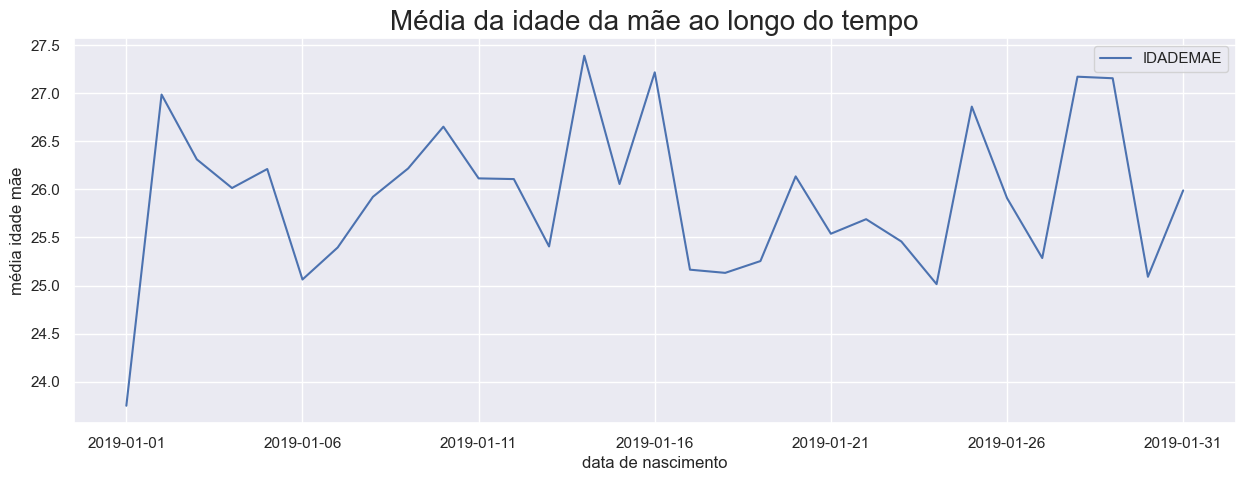

In [40]:
pd.pivot_table(sinasc, values='IDADEMAE', index='DTNASC',
               aggfunc='mean').plot(figsize=[15, 5])

plt.title('Média da idade da mãe ao longo do tempo', loc='center',fontsize=20)
plt.ylabel('média idade mãe')
plt.xlabel('data de nascimento')
plt.show()


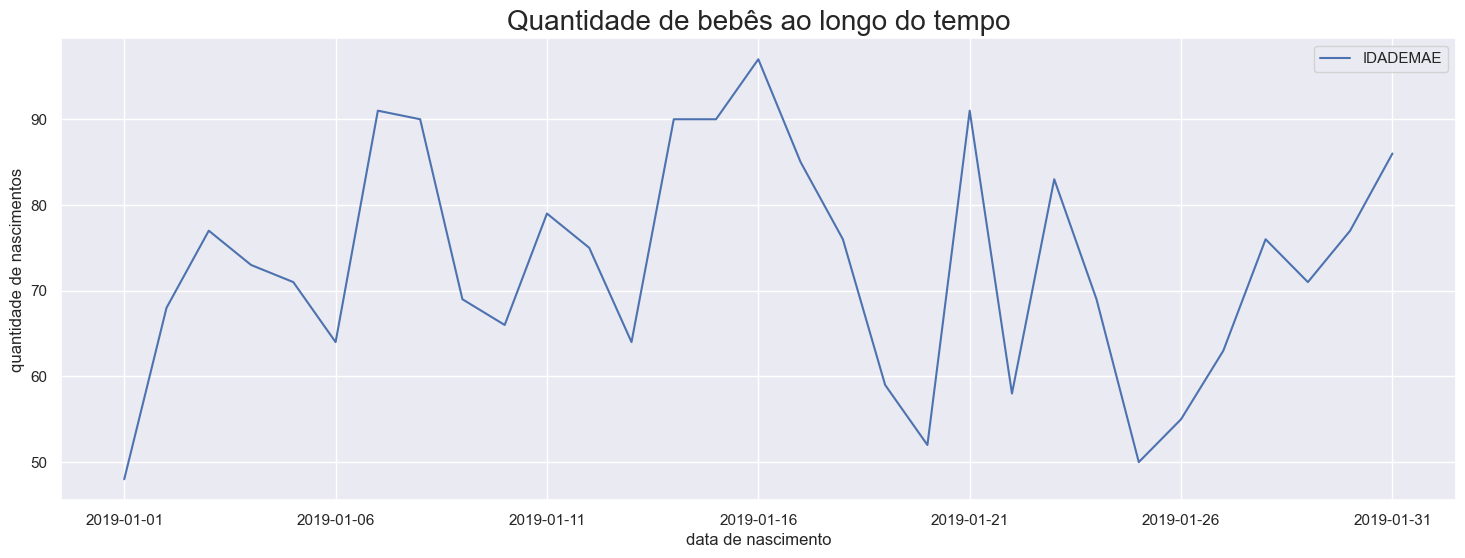

In [41]:
pd.pivot_table(sinasc, values='IDADEMAE', index='DTNASC',
               aggfunc='count').plot(figsize=[18, 6])

plt.title('Quantidade de bebês ao longo do tempo', loc='center', fontsize=20)
plt.ylabel('quantidade de nascimentos')
plt.xlabel('data de nascimento')
plt.show()


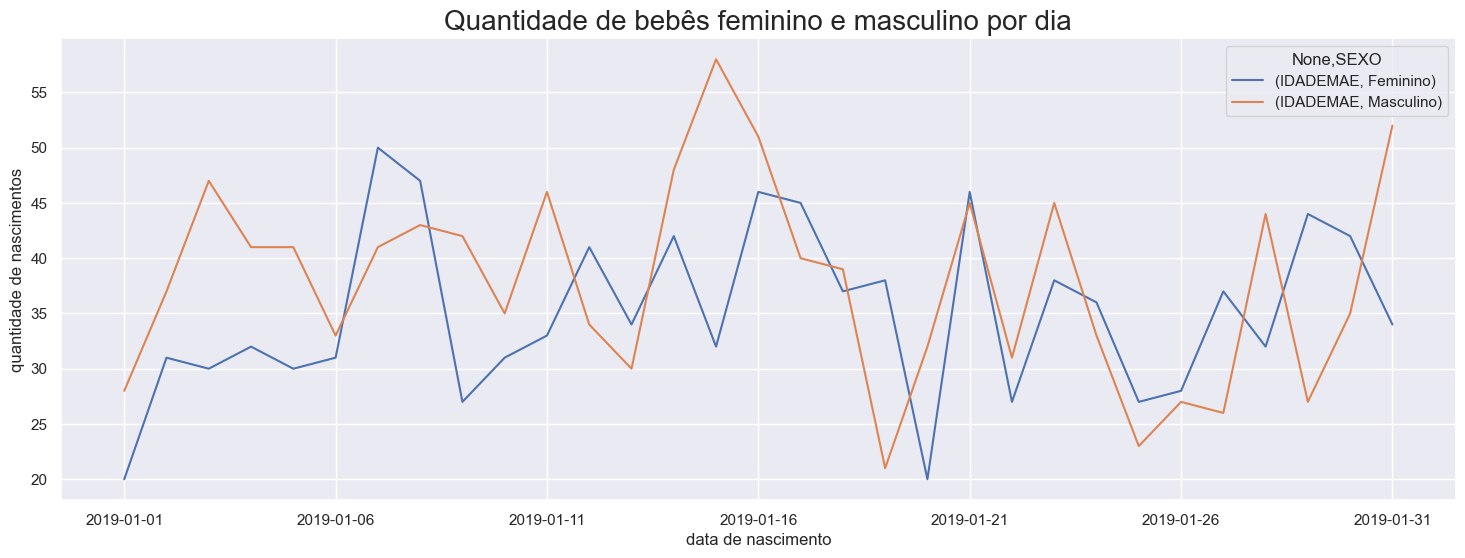

In [42]:
pd.pivot_table(sinasc, values='IDADEMAE', index=['DTNASC', 'SEXO'],
               aggfunc='count').unstack().plot(figsize=[18, 6])

plt.title('Quantidade de bebês feminino e masculino por dia', loc='center', fontsize=20)
plt.ylabel('quantidade de nascimentos')
plt.xlabel('data de nascimento')
plt.show()


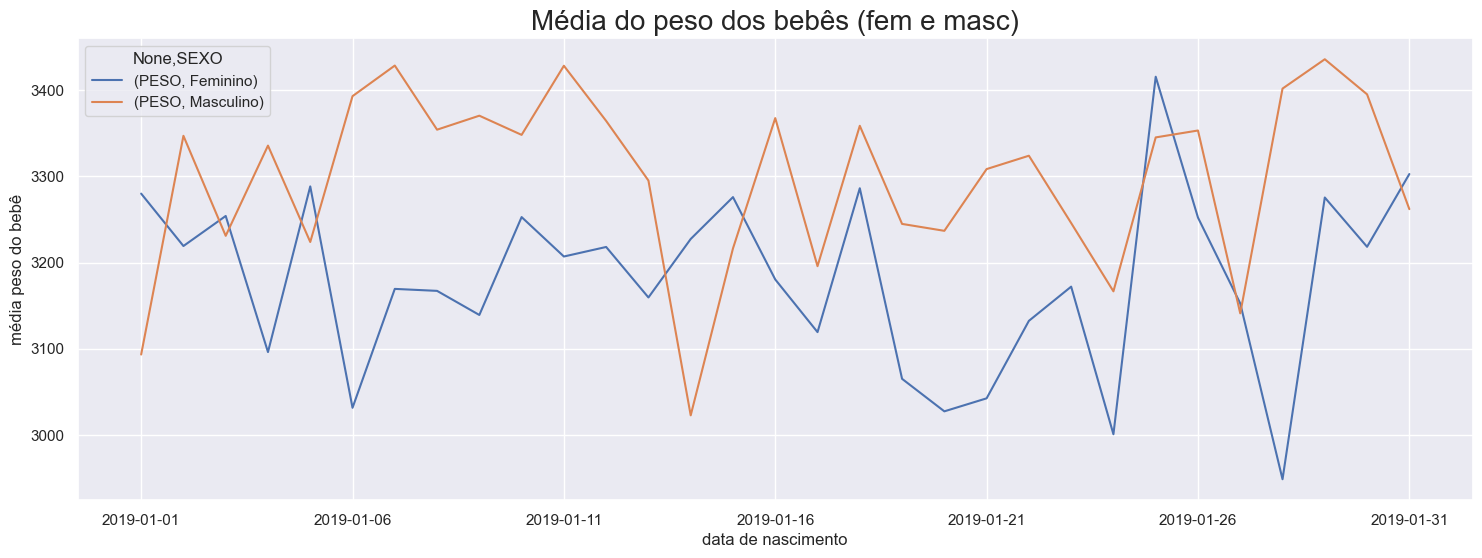

In [43]:
pd.pivot_table(sinasc, values='PESO', index=['DTNASC', 'SEXO'],
               aggfunc='mean').unstack().plot(figsize=[18, 6])

plt.title('Média do peso dos bebês (fem e masc)', loc='center', fontsize=20)
plt.ylabel('média peso do bebê')
plt.xlabel('data de nascimento')
plt.show()


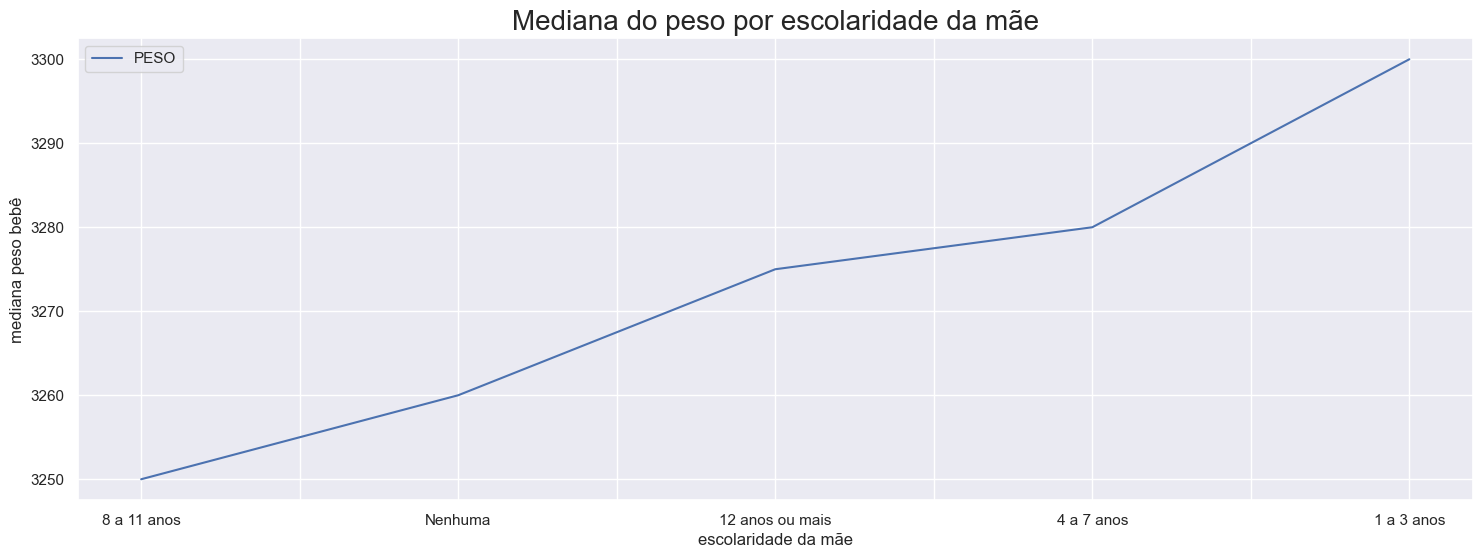

In [44]:
pd.pivot_table(sinasc, values='PESO', index='ESCMAE',
               aggfunc='median').sort_values('PESO').plot(figsize=[18, 6])

plt.title('Mediana do peso por escolaridade da mãe', loc='center', fontsize=20)
plt.ylabel('mediana peso bebê')
plt.xlabel('escolaridade da mãe')
plt.show()


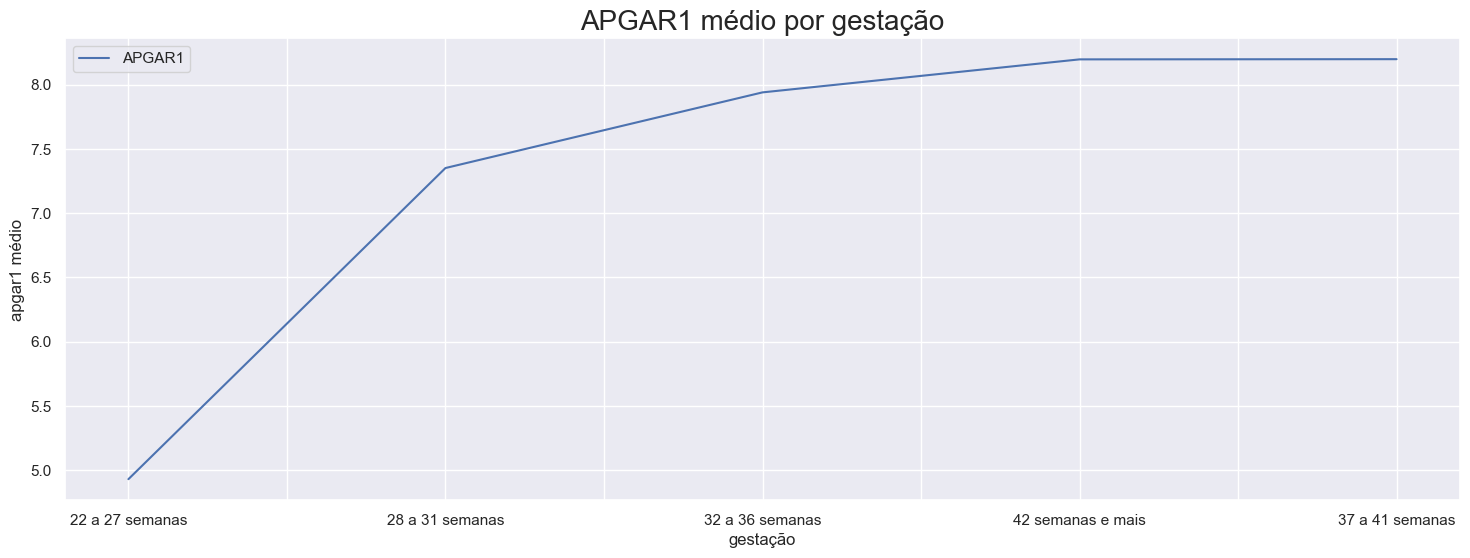

In [45]:
pd.pivot_table(sinasc, values='APGAR1', index='GESTACAO',
               aggfunc='mean').sort_values('APGAR1').plot(figsize=[18, 6])

plt.title('APGAR1 médio por gestação', loc='center', fontsize=20)
plt.ylabel('apgar1 médio')
plt.xlabel('gestação')
plt.show()


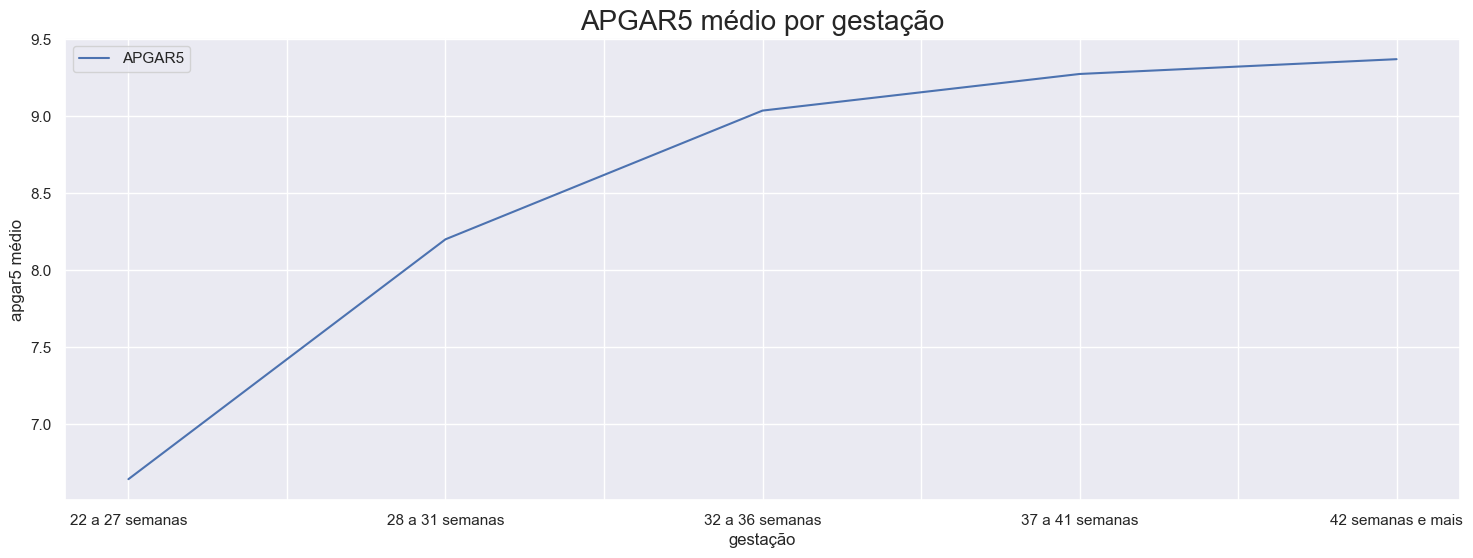

In [46]:
pd.pivot_table(sinasc, values='APGAR5', index='GESTACAO',
               aggfunc='mean').sort_values('APGAR5').plot(figsize=[18, 6])

plt.title('APGAR5 médio por gestação', loc='center', fontsize=20)
plt.ylabel('apgar5 médio')
plt.xlabel('gestação')
plt.show()


In [47]:
# Pasta base onde as imagens serão salvas
pasta_imagens = './imagens'
os.makedirs(pasta_imagens, exist_ok=True)


In [48]:
def gerar_graficos_mes(df, nome_mes, sigla_mes):
    # Criar subpasta do mês (ex: ./imagens/MAR)
    pasta_mes = os.path.join(pasta_imagens, sigla_mes)
    os.makedirs(pasta_mes, exist_ok=True)

    # 3.1 Média da idade da mãe ao longo do tempo
    pd.pivot_table(df, values='IDADEMAE', index='DTNASC',
                   aggfunc='mean').plot(figsize=[15, 5])
    plt.title(f'{nome_mes} - Média da idade da mãe ao longo do tempo',
              loc='center', fontsize=20)
    plt.ylabel('média idade mãe', fontsize=14)
    plt.xlabel('data de nascimento', fontsize=14)
    plt.savefig(os.path.join(pasta_mes, f'{sigla_mes}_3.1_media_idade_mae.png'),
                dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

    # 3.2 Quantidade de bebês ao longo do tempo
    pd.pivot_table(df, values='IDADEMAE', index='DTNASC',
                   aggfunc='count').plot(figsize=[18, 6])
    plt.title(f'{nome_mes} - Quantidade de bebês ao longo do tempo',
              loc='center', fontsize=20)
    plt.ylabel('quantidade de nascimentos', fontsize=14)
    plt.xlabel('data de nascimento', fontsize=14)
    plt.savefig(os.path.join(pasta_mes, f'{sigla_mes}_3.2_qtd_bebes.png'),
                dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

    # 3.3 Quantidade de bebês feminino e masculino por dia
    pd.pivot_table(df, values='IDADEMAE', index=['DTNASC', 'SEXO'],
                   aggfunc='count').unstack().plot(figsize=[18, 6])
    plt.title(f'{nome_mes} - Quantidade de bebês feminino e masculino por dia',
              loc='center', fontsize=20)
    plt.ylabel('quantidade de nascimentos', fontsize=14)
    plt.xlabel('data de nascimento', fontsize=14)
    plt.savefig(os.path.join(pasta_mes, f'{sigla_mes}_3.3_qtd_fem_masc.png'),
                dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

    # 3.4 Média do peso dos bebês feminino e masculino por dia
    pd.pivot_table(df, values='PESO', index=['DTNASC', 'SEXO'],
                   aggfunc='mean').unstack().plot(figsize=[18, 6])
    plt.title(f'{nome_mes} - Média do peso dos bebês (fem e masc)',
              loc='center', fontsize=20)
    plt.ylabel('média peso do bebê', fontsize=14)
    plt.xlabel('data de nascimento', fontsize=14)
    plt.savefig(os.path.join(pasta_mes, f'{sigla_mes}_3.4_peso_fem_masc.png'),
                dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

    # 3.5 Mediana do peso por escolaridade da mãe
    pd.pivot_table(df, values='PESO', index='ESCMAE',
                   aggfunc='median').sort_values('PESO').plot(figsize=[18, 6])
    plt.title(f'{nome_mes} - Mediana do peso por escolaridade da mãe',
              loc='center', fontsize=20)
    plt.ylabel('mediana peso do bebê', fontsize=14)
    plt.xlabel('escolaridade da mãe', fontsize=14)
    plt.savefig(os.path.join(pasta_mes, f'{sigla_mes}_3.5_peso_escolaridade.png'),
                dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

    # 3.6 APGAR1 médio por gestação
    pd.pivot_table(df, values='APGAR1', index='GESTACAO',
                   aggfunc='mean').sort_values('APGAR1').plot(figsize=[18, 6])
    plt.title(f'{nome_mes} - APGAR1 médio por gestação',
              loc='center', fontsize=20)
    plt.ylabel('apgar1 médio', fontsize=14)
    plt.xlabel('gestação', fontsize=14)
    plt.savefig(os.path.join(pasta_mes, f'{sigla_mes}_3.6_apgar1_gestacao.png'),
                dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

    # 3.7 APGAR5 médio por gestação
    pd.pivot_table(df, values='APGAR5', index='GESTACAO',
                   aggfunc='mean').sort_values('APGAR5').plot(figsize=[18, 6])
    plt.title(f'{nome_mes} - APGAR5 médio por gestação',
              loc='center', fontsize=20)
    plt.ylabel('apgar5 médio', fontsize=14)
    plt.xlabel('gestação', fontsize=14)
    plt.savefig(os.path.join(pasta_mes, f'{sigla_mes}_3.7_apgar5_gestacao.png'),
                dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()



================ Março ================



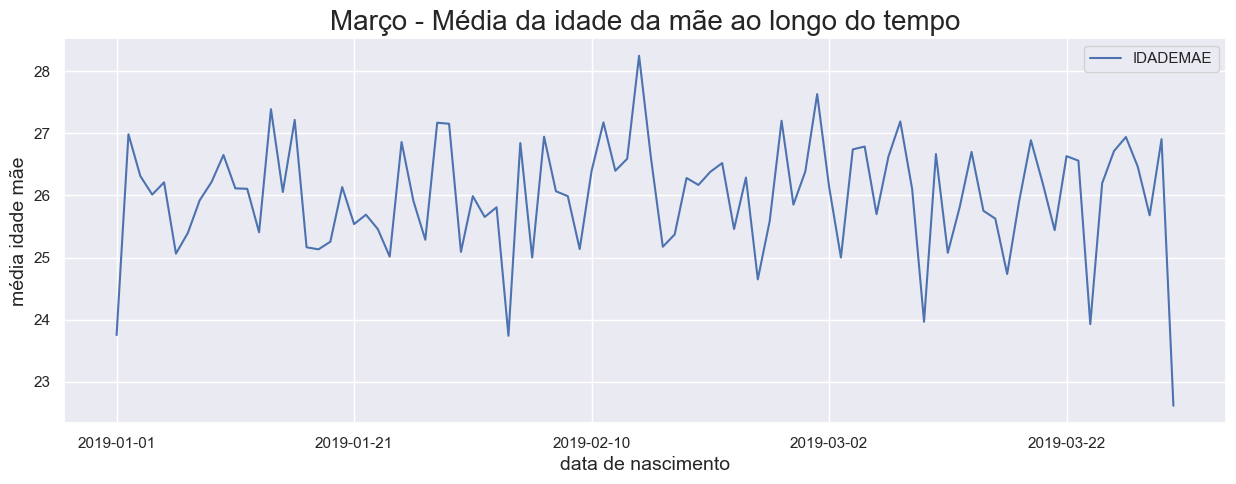

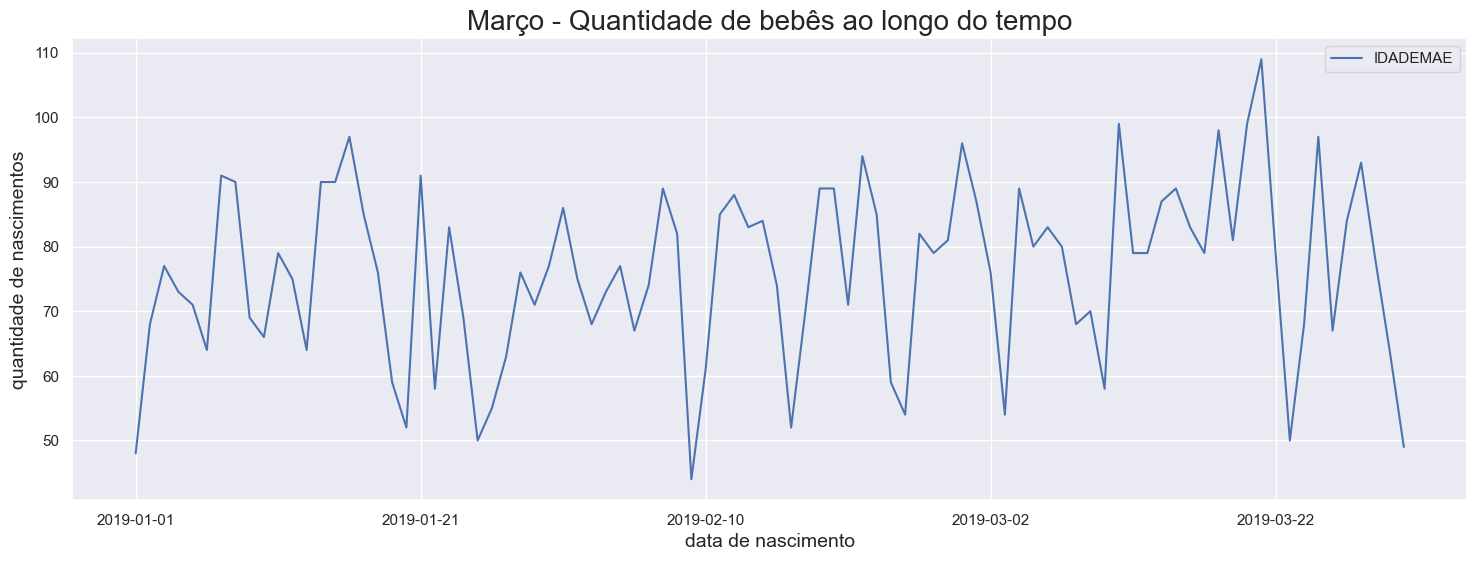

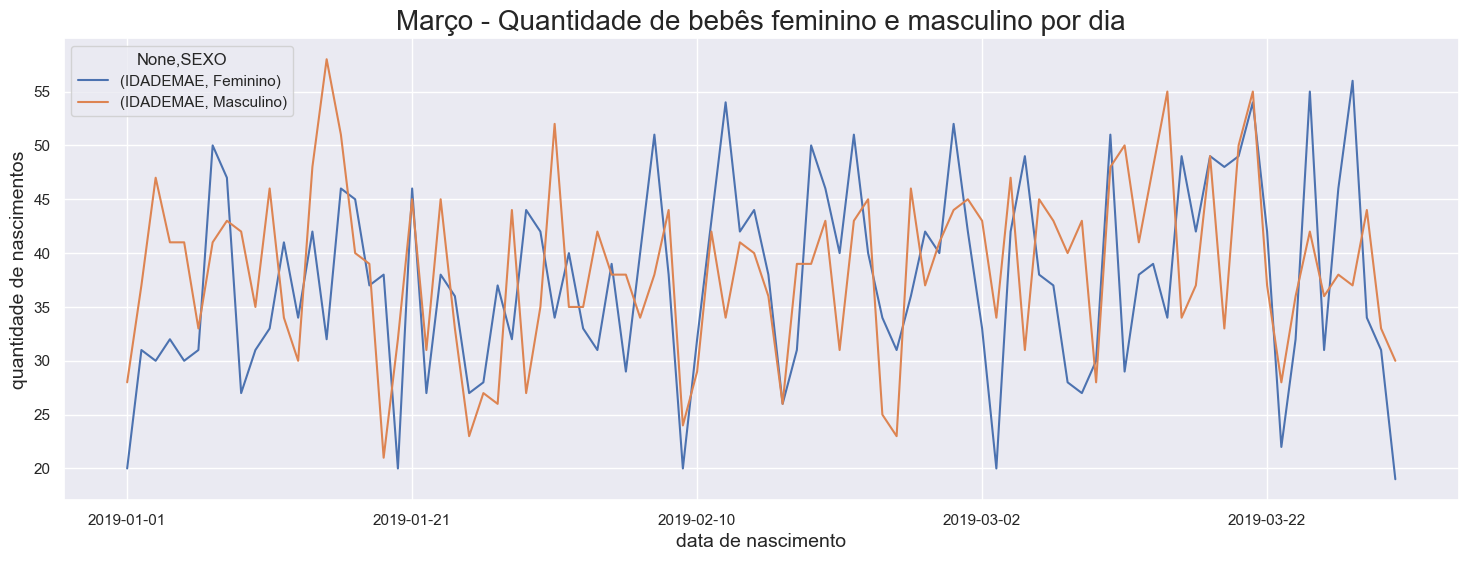

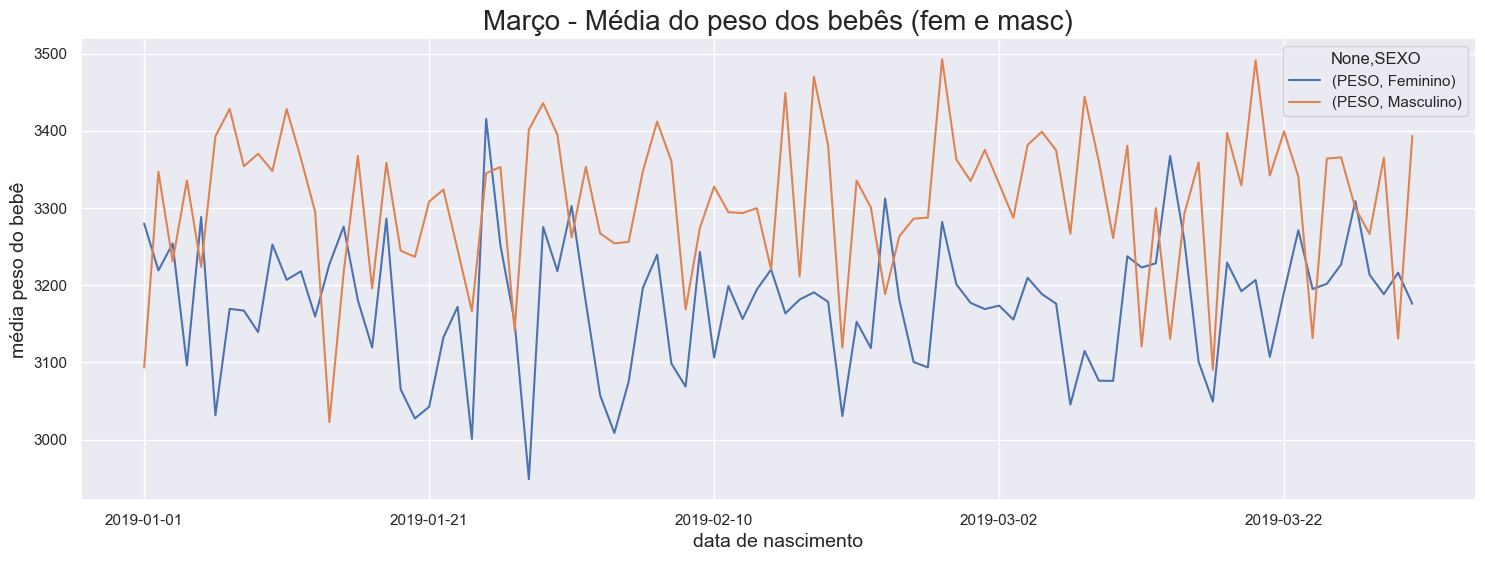

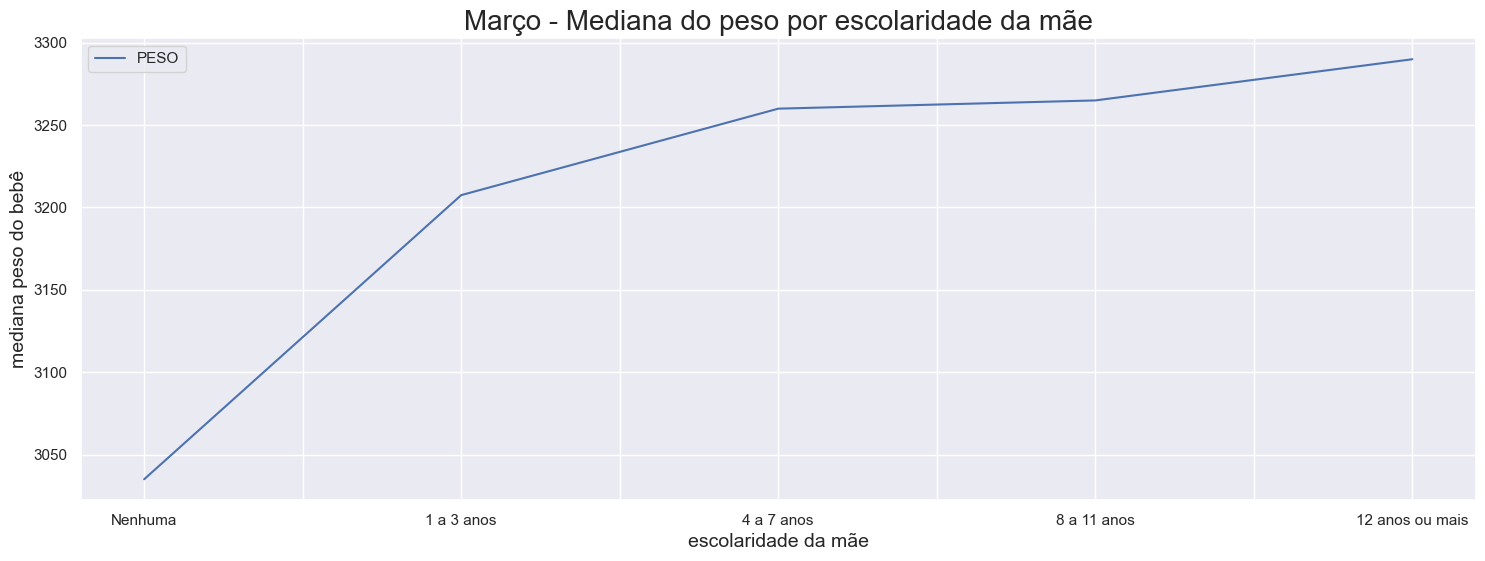

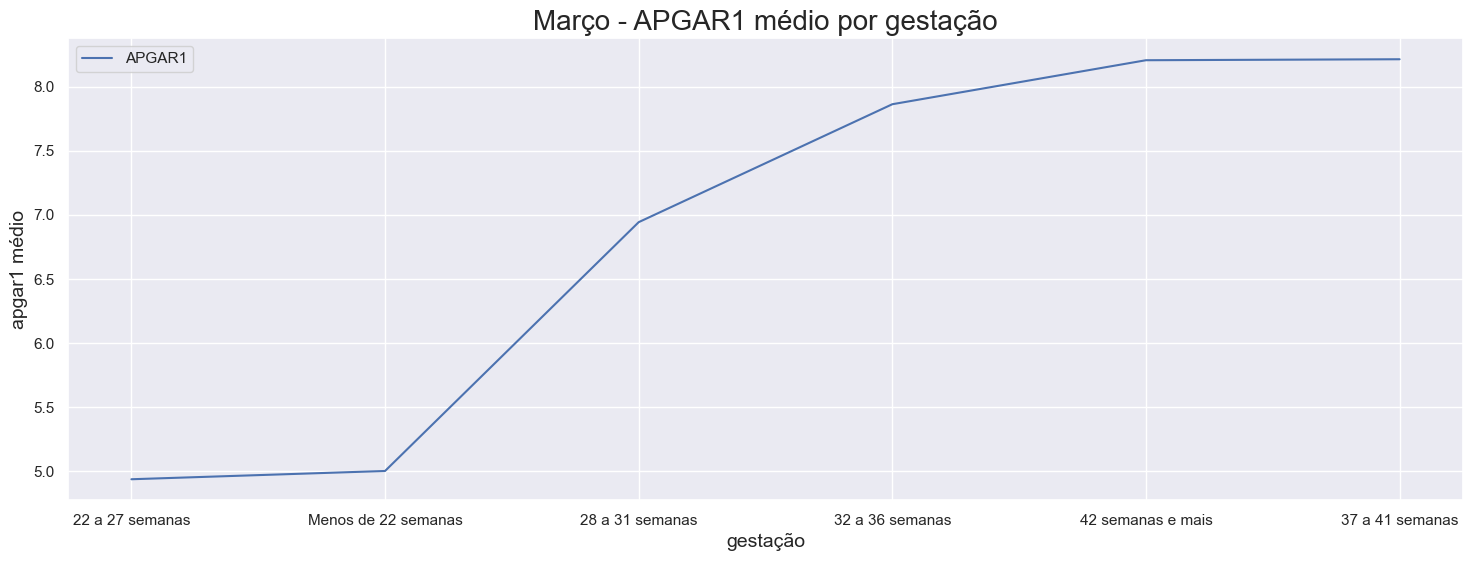

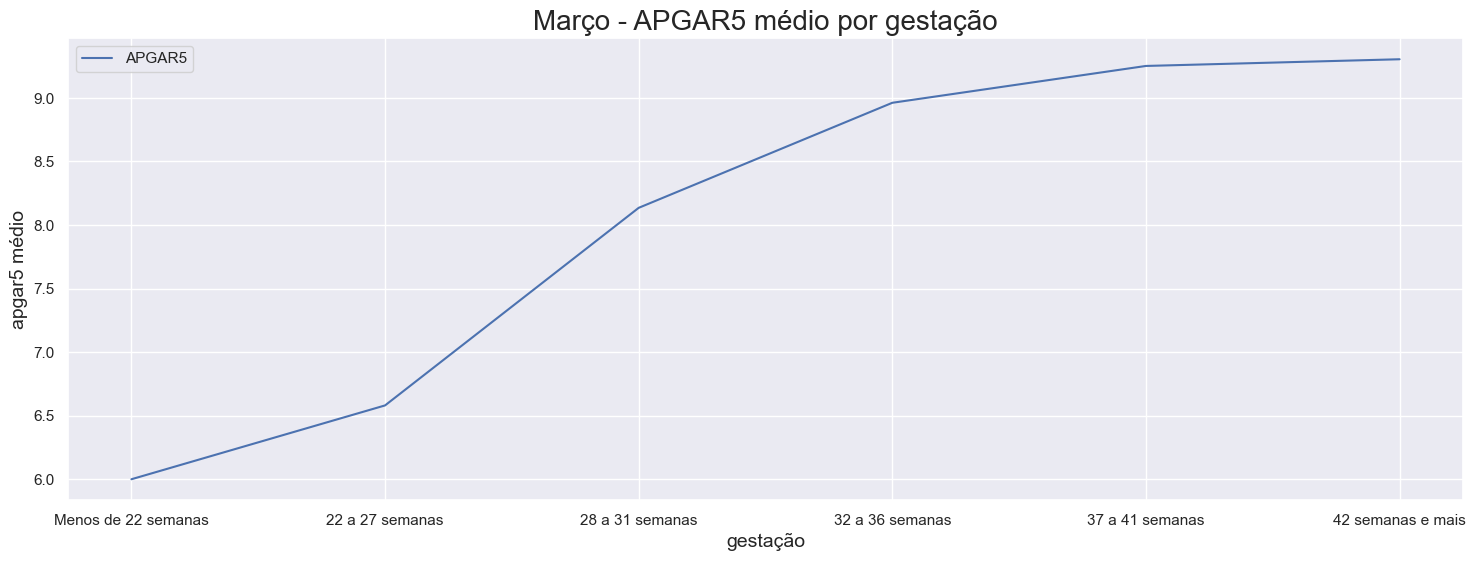


================ Abril ================



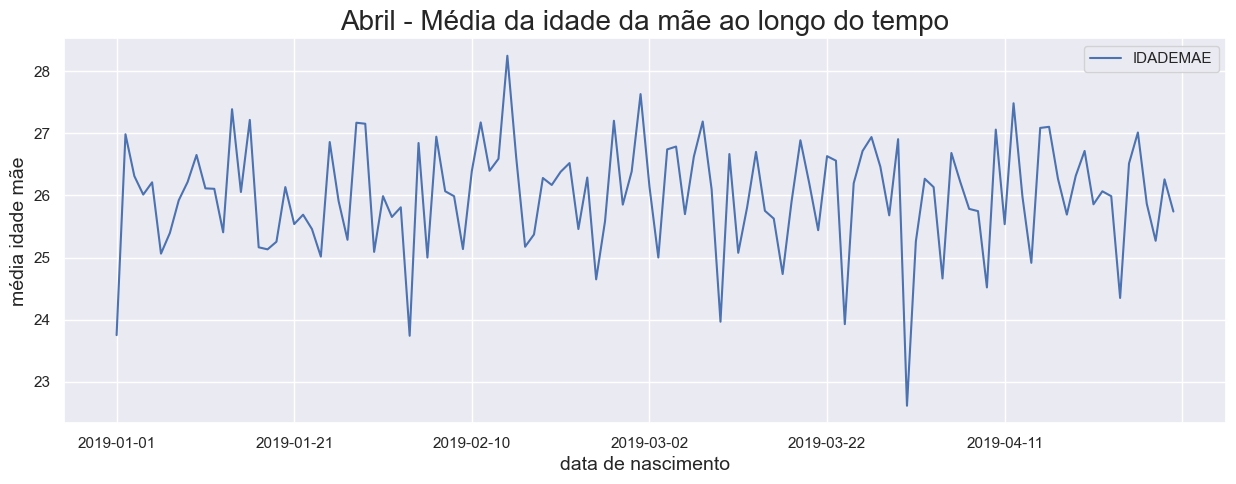

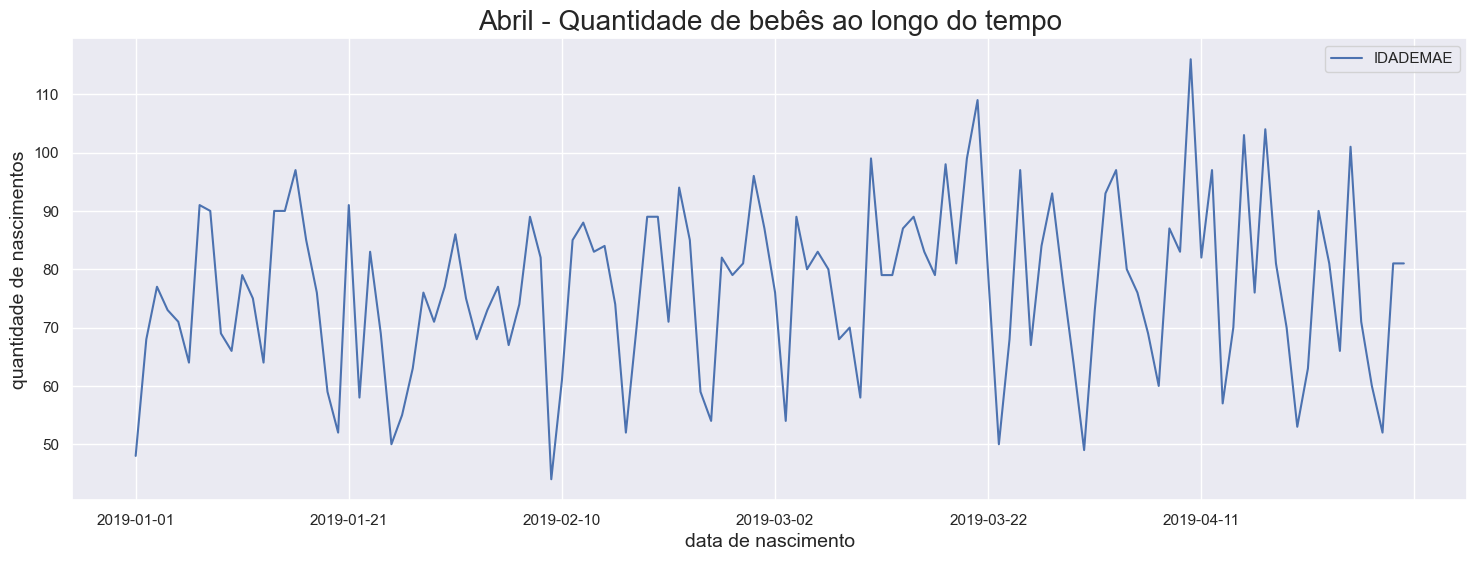

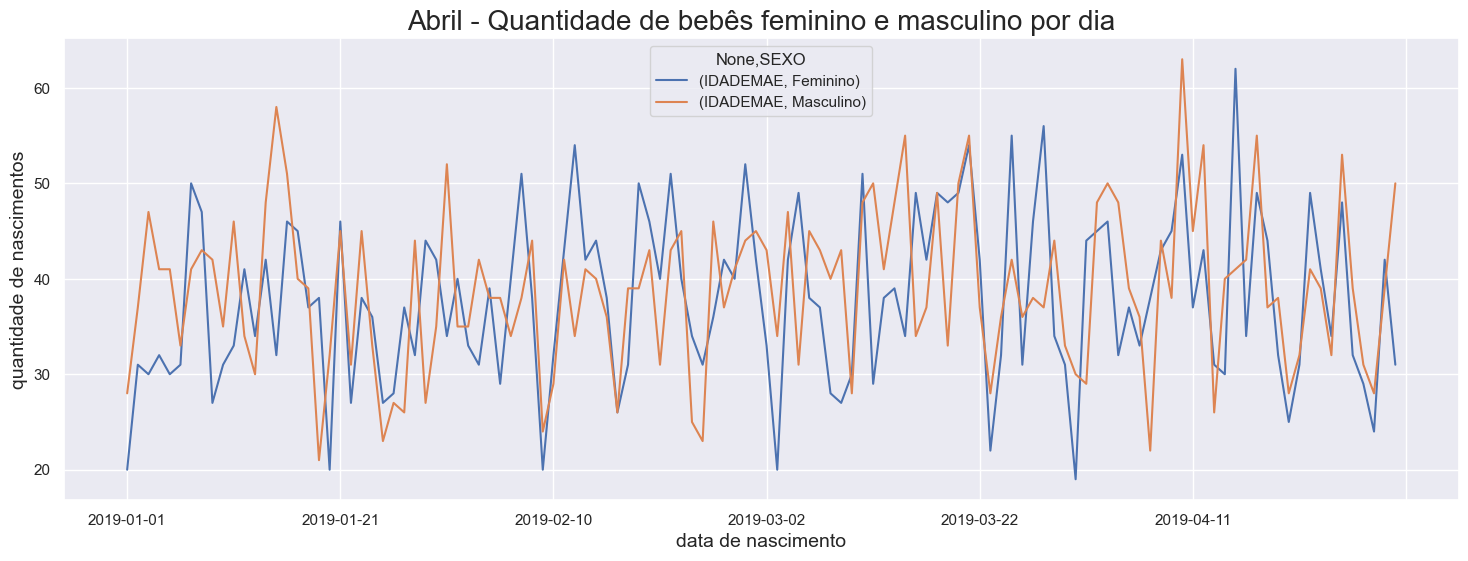

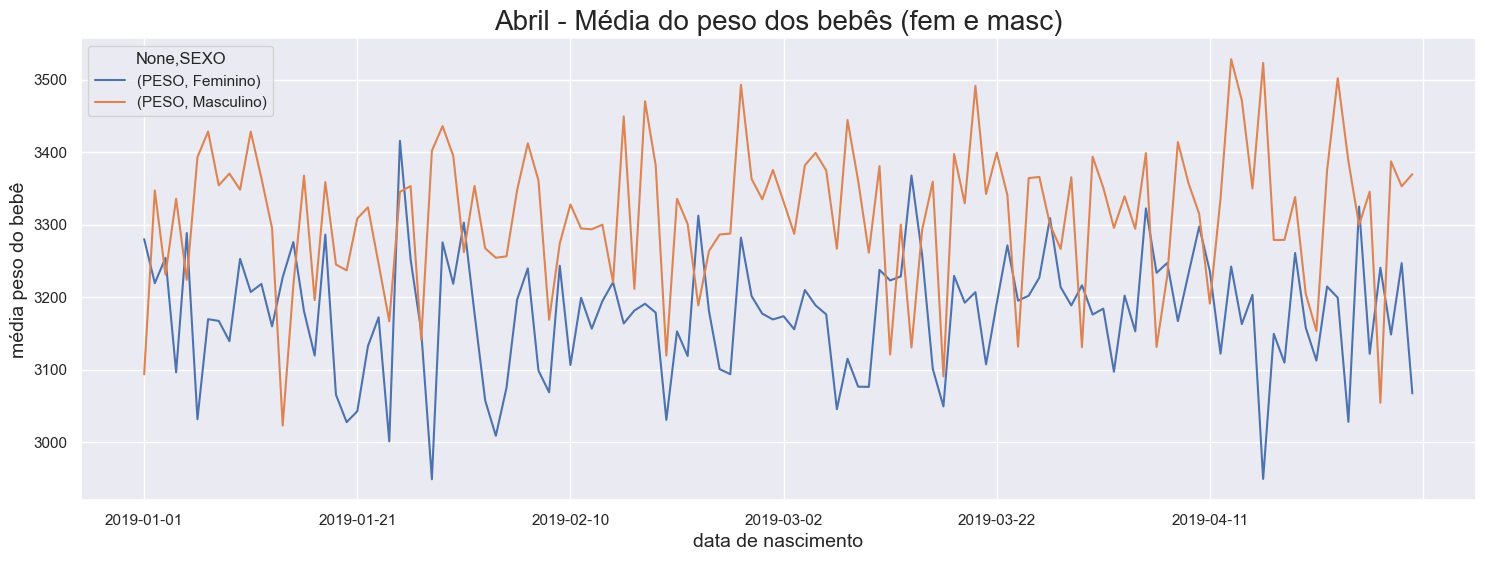

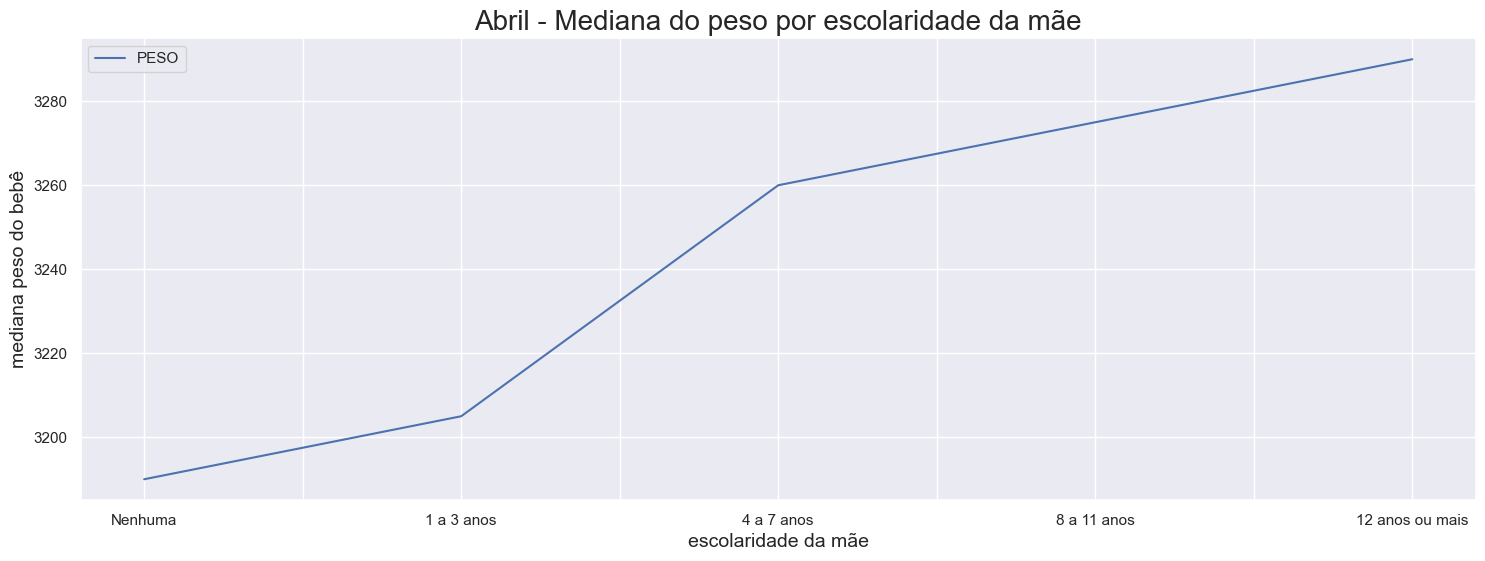

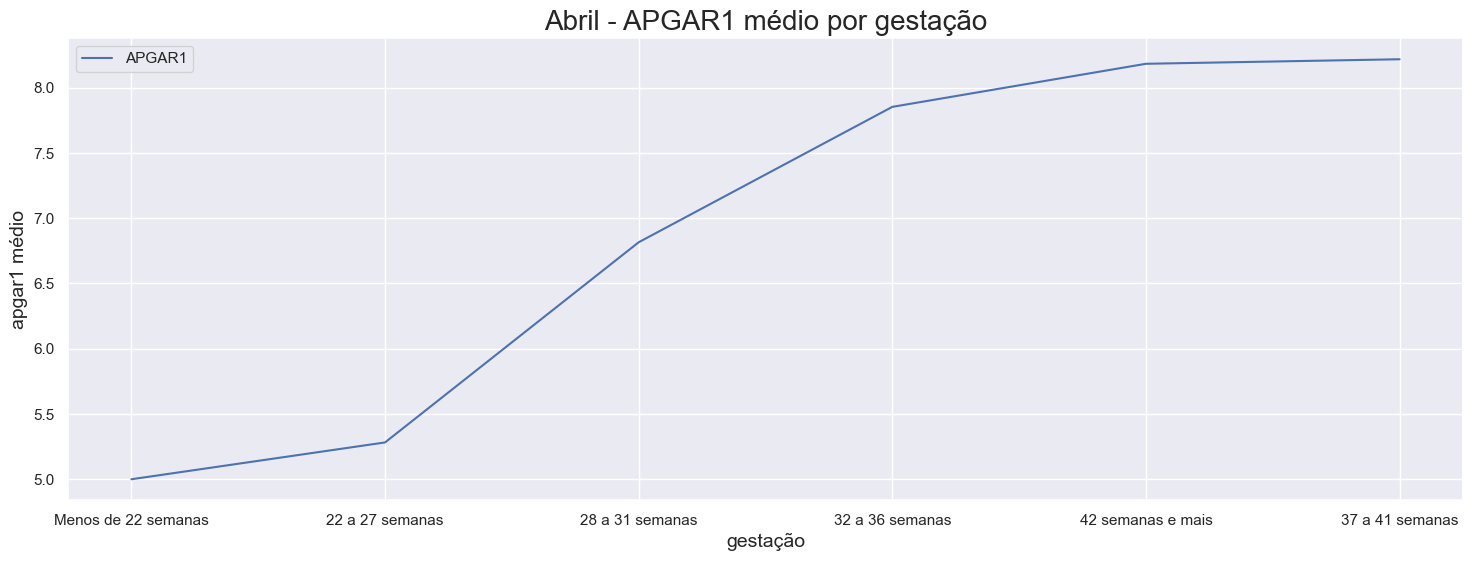

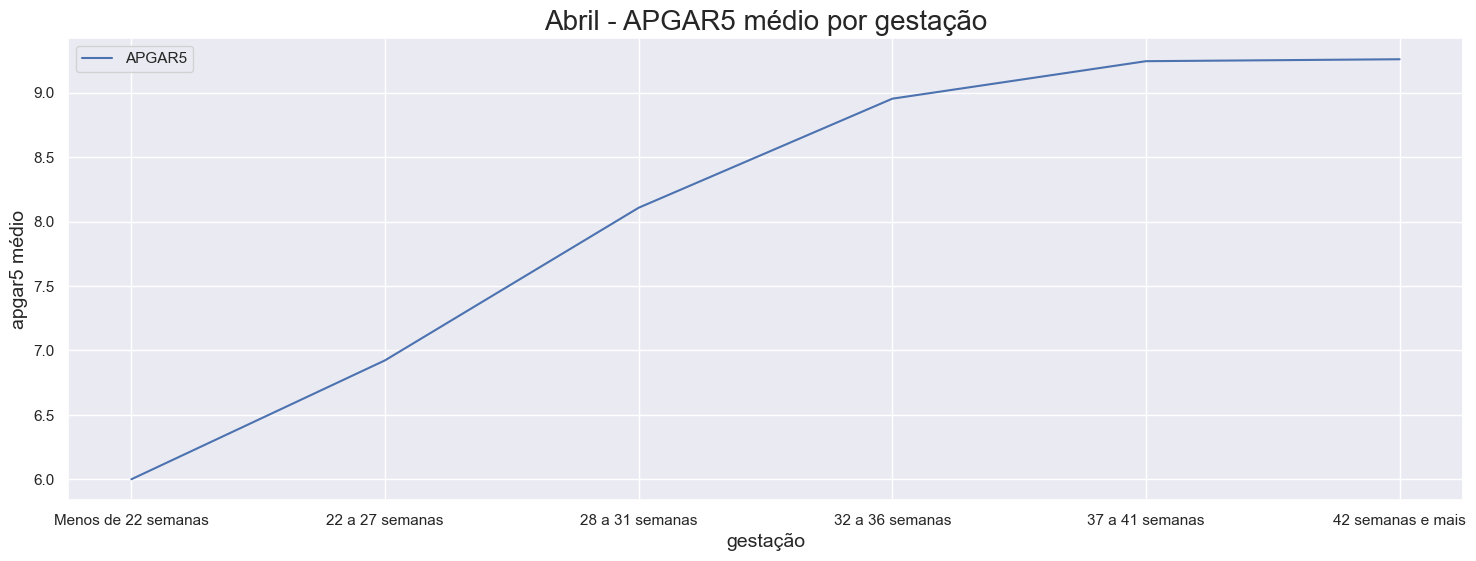


================ Maio ================



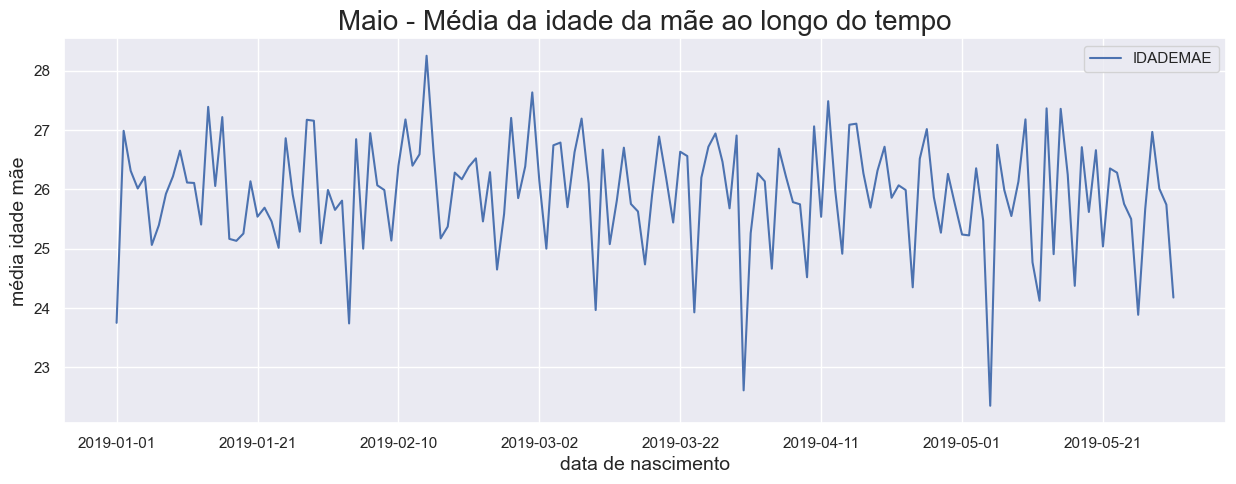

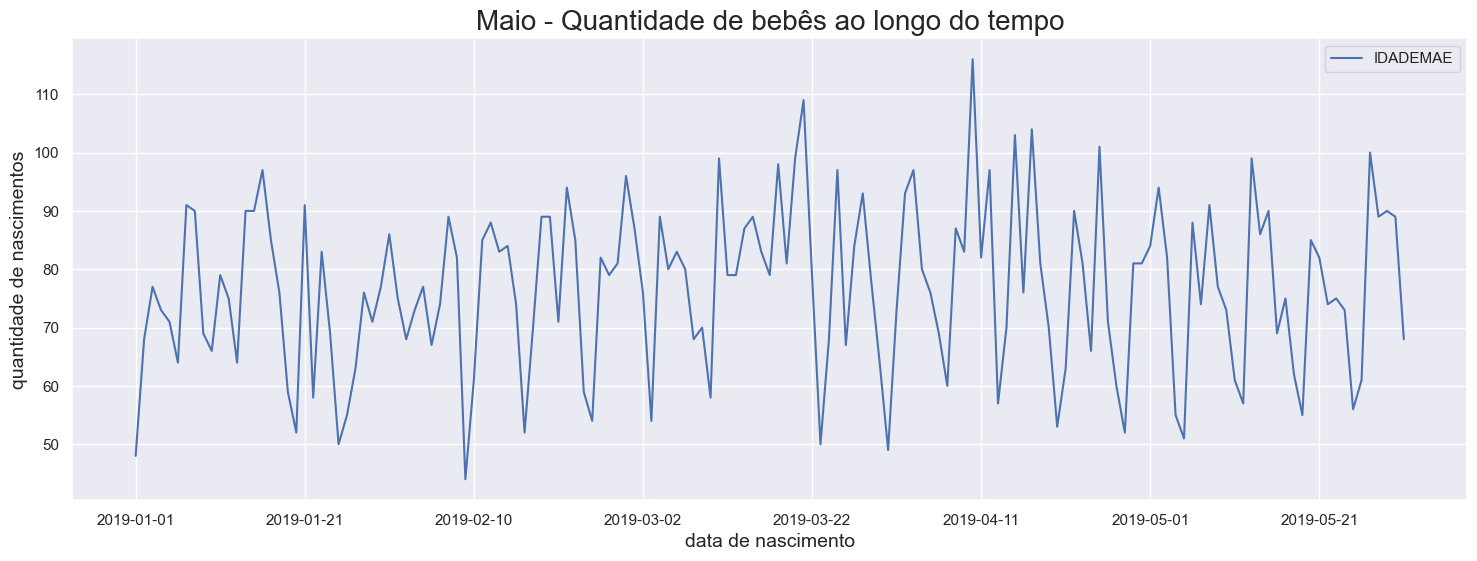

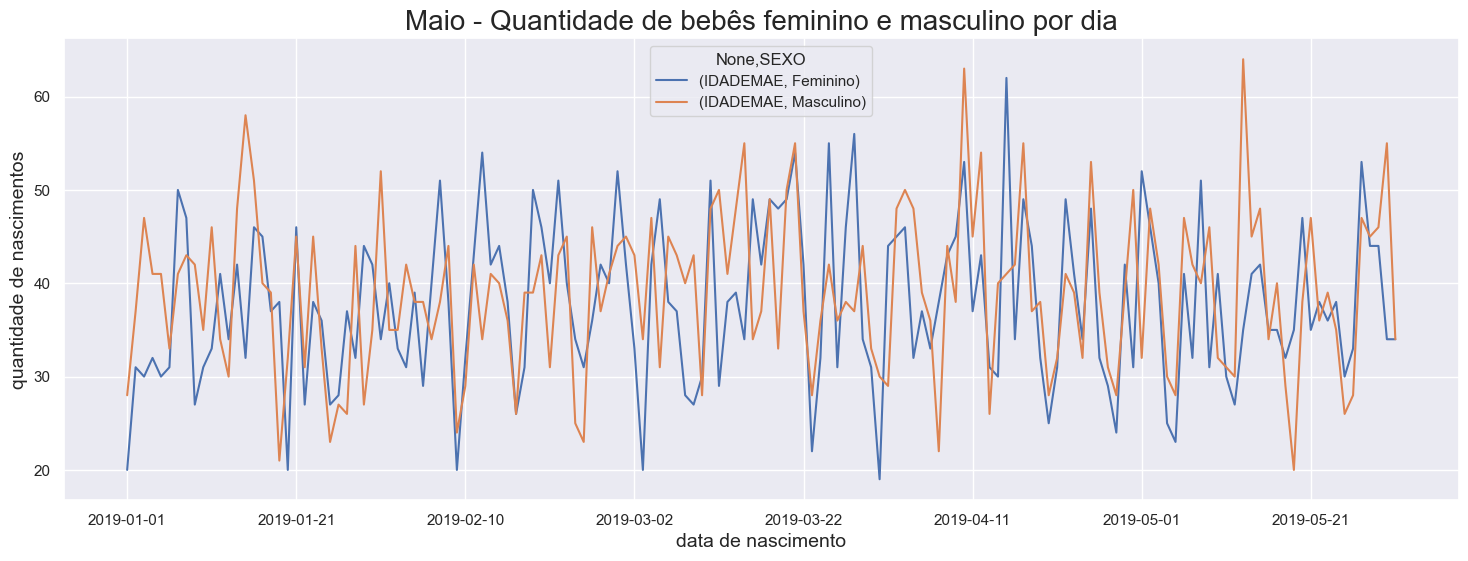

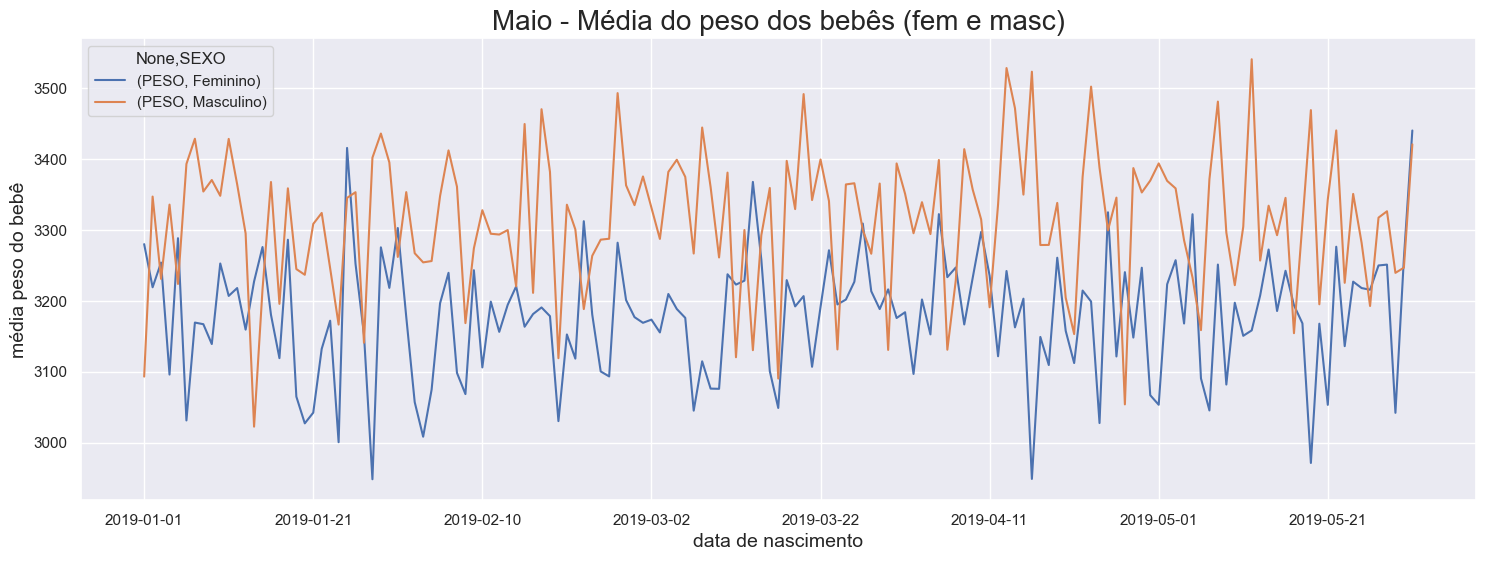

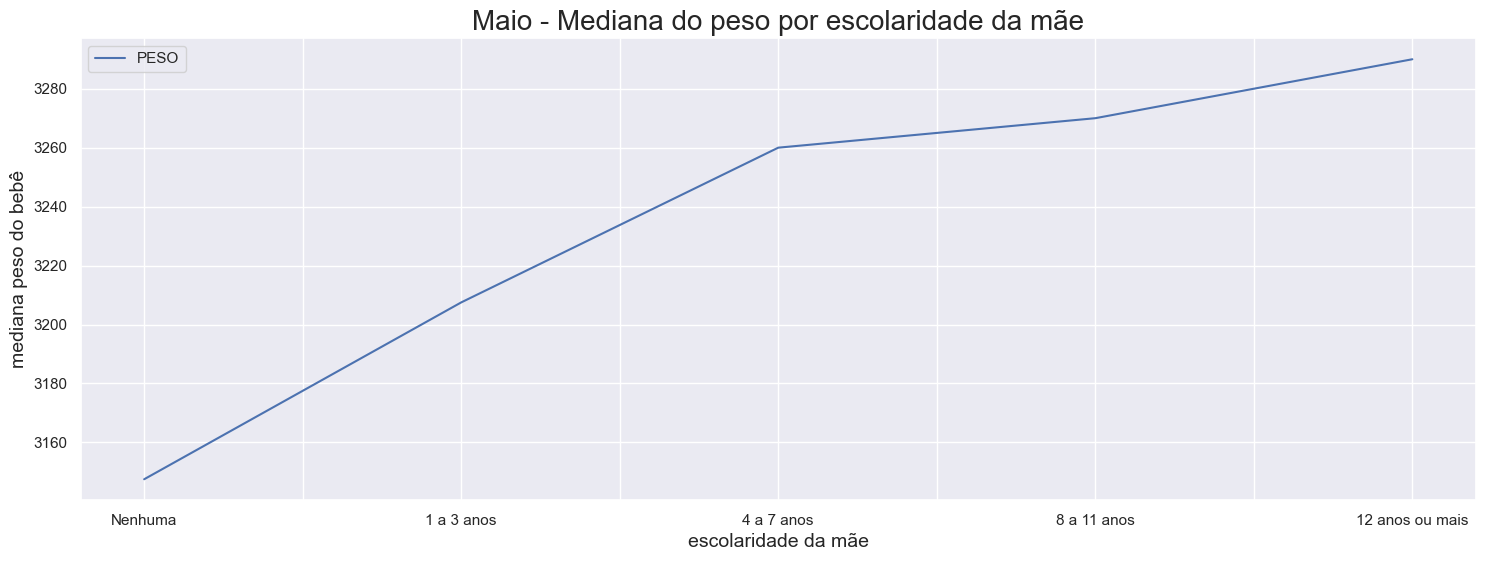

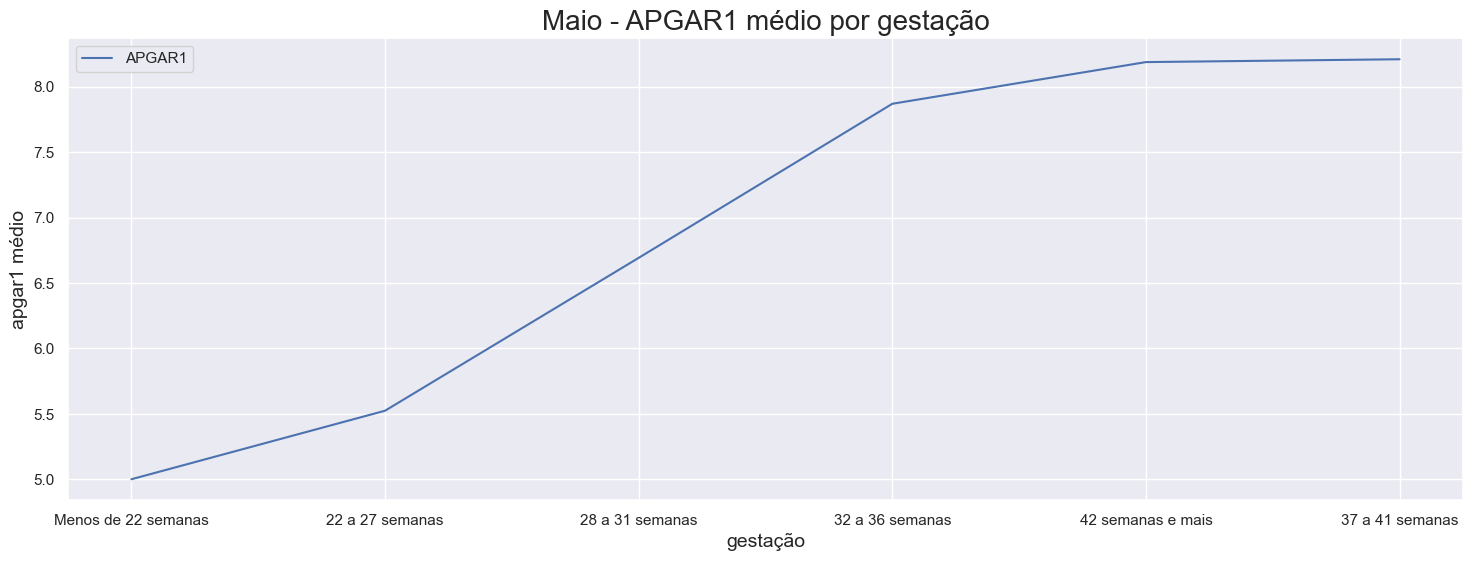

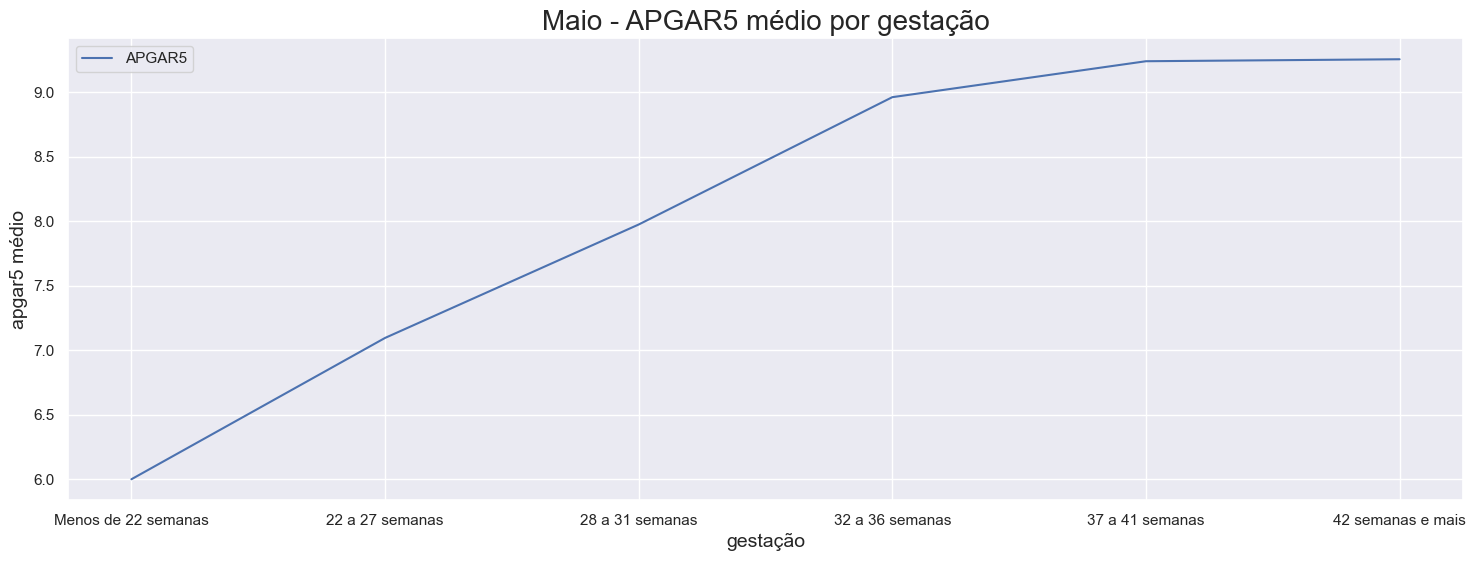


================ Junho ================



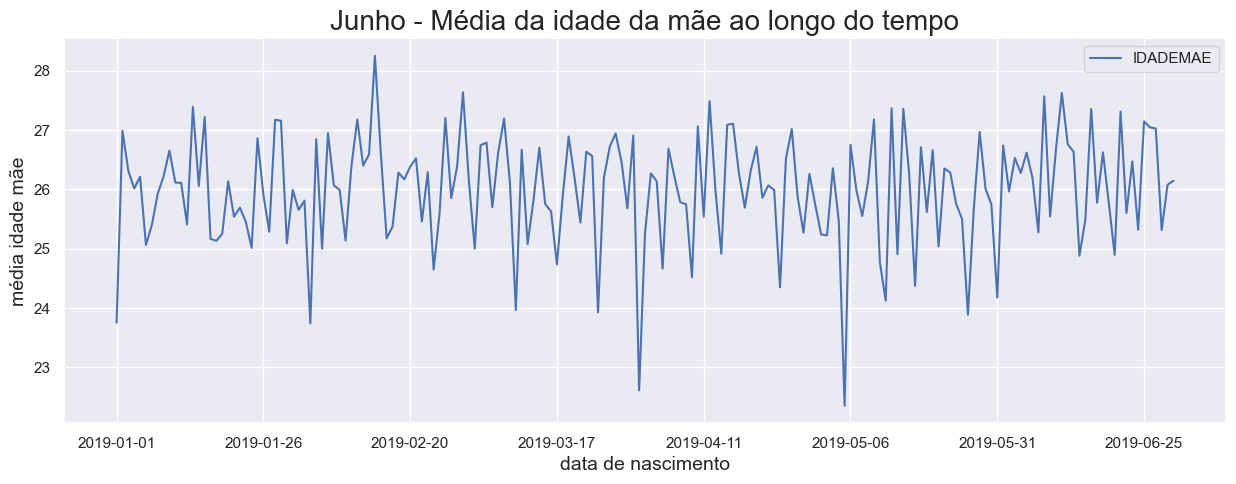

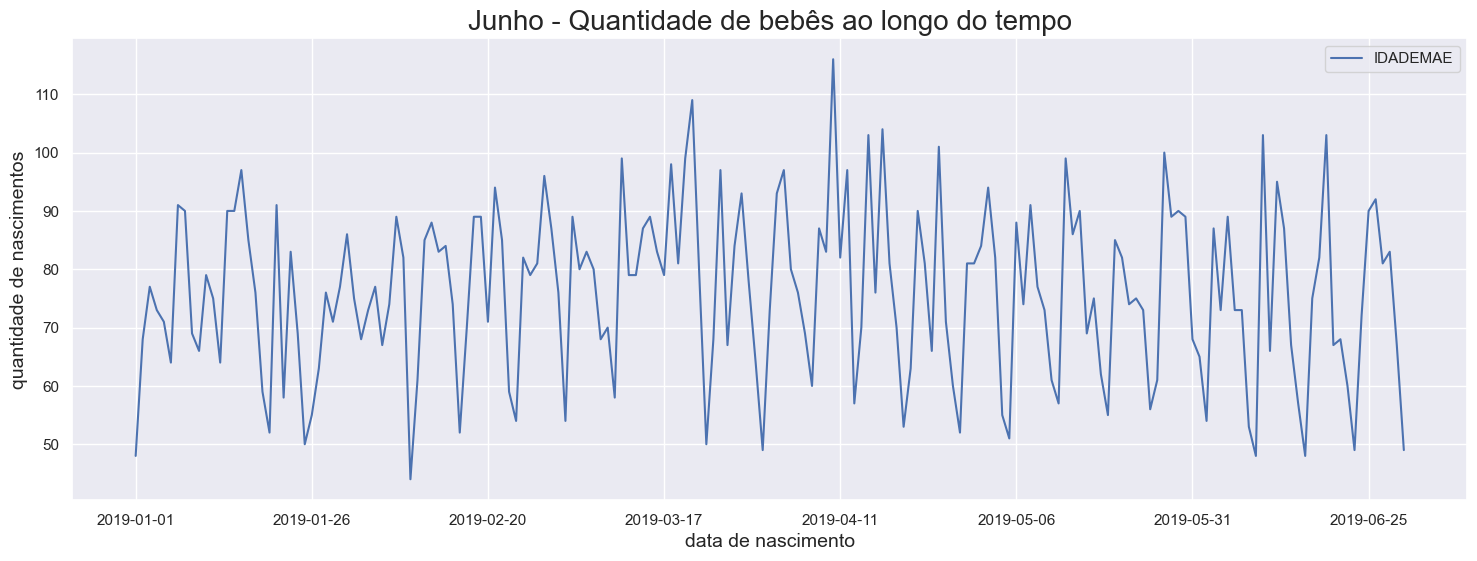

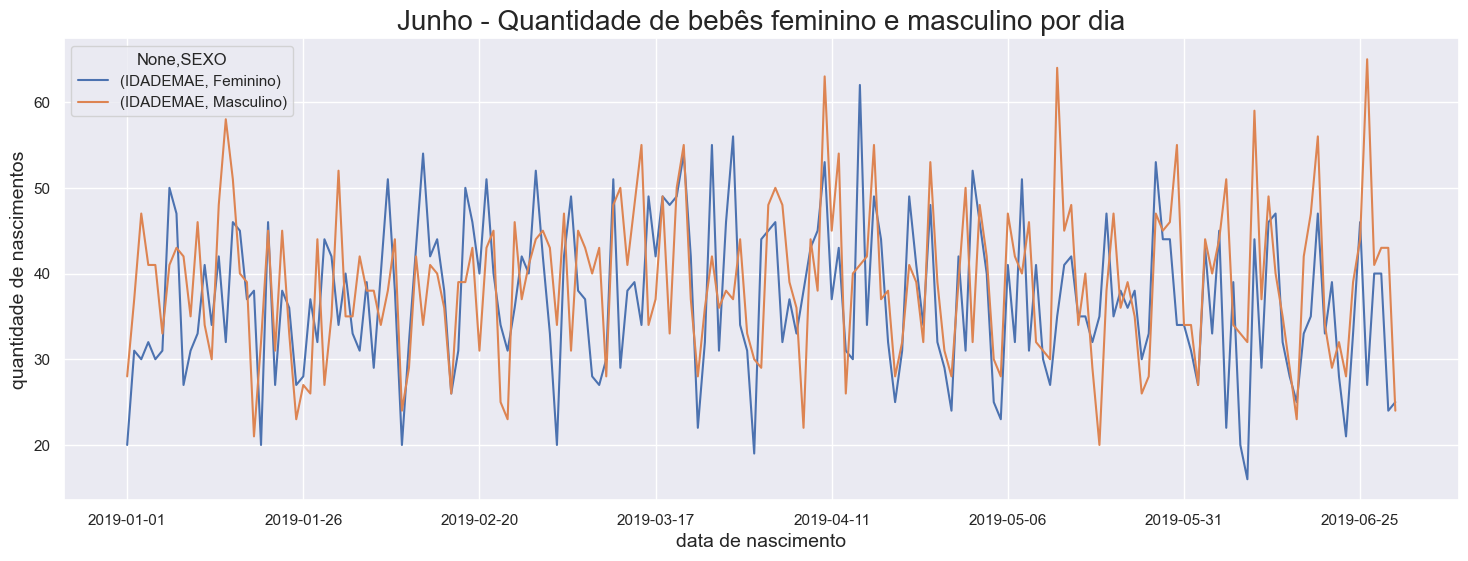

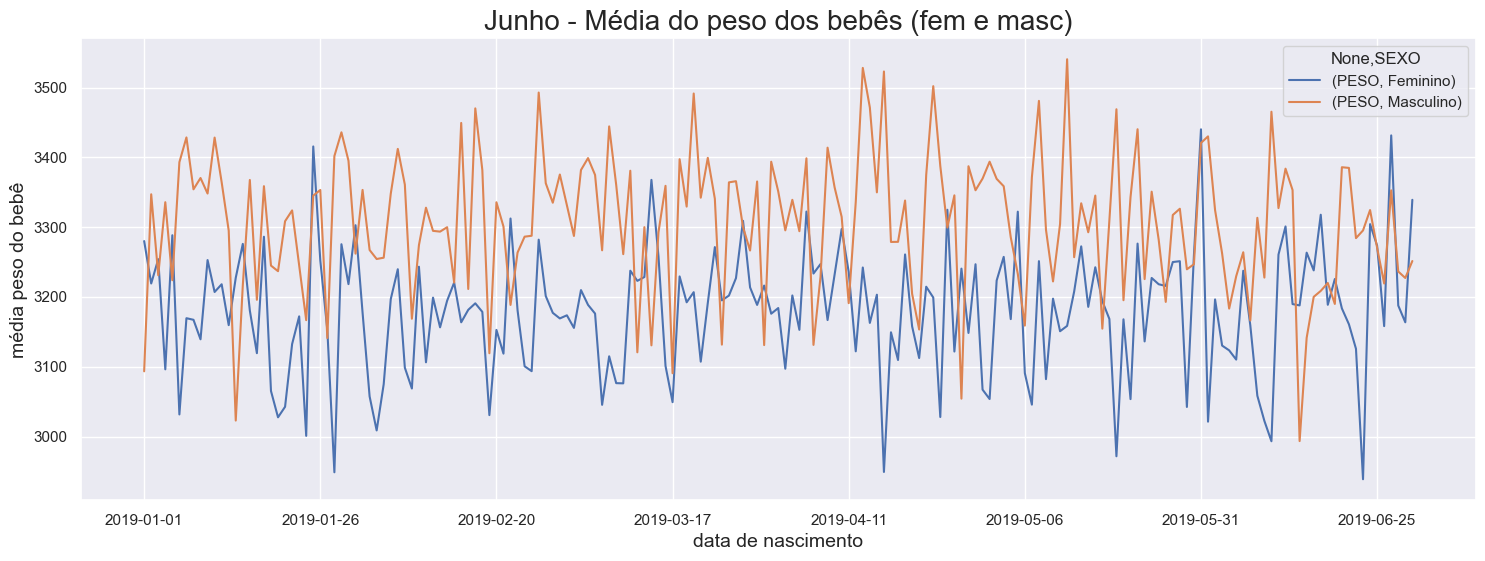

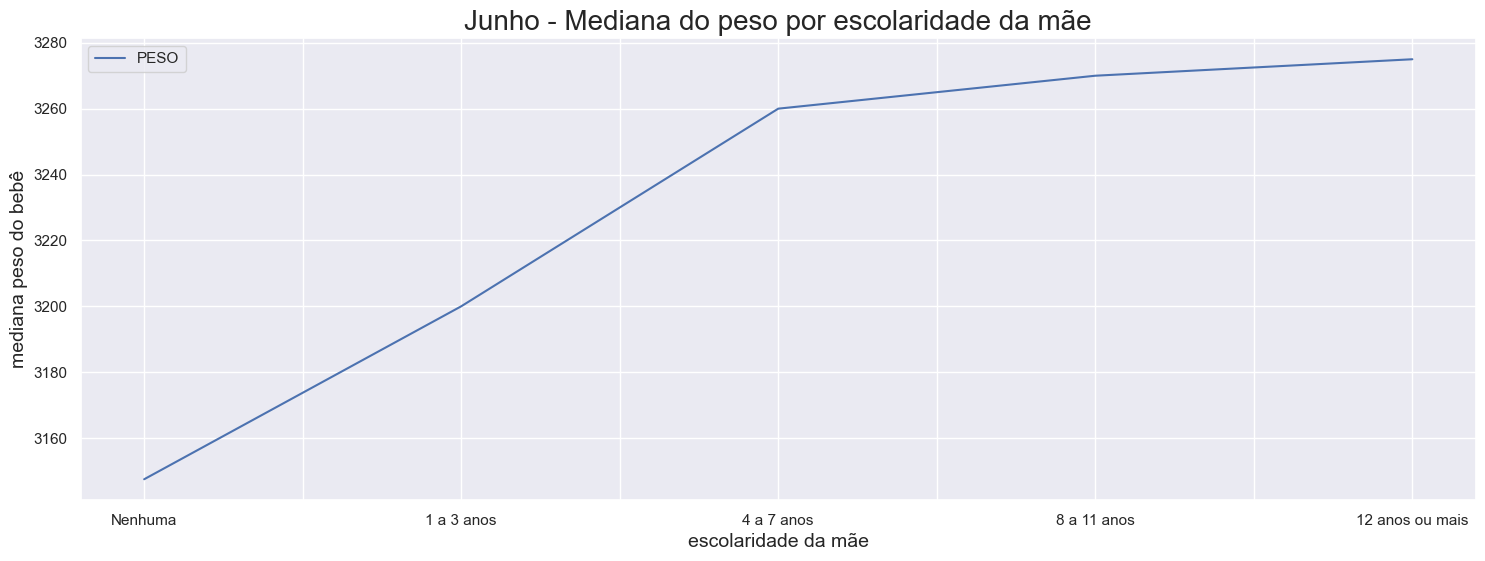

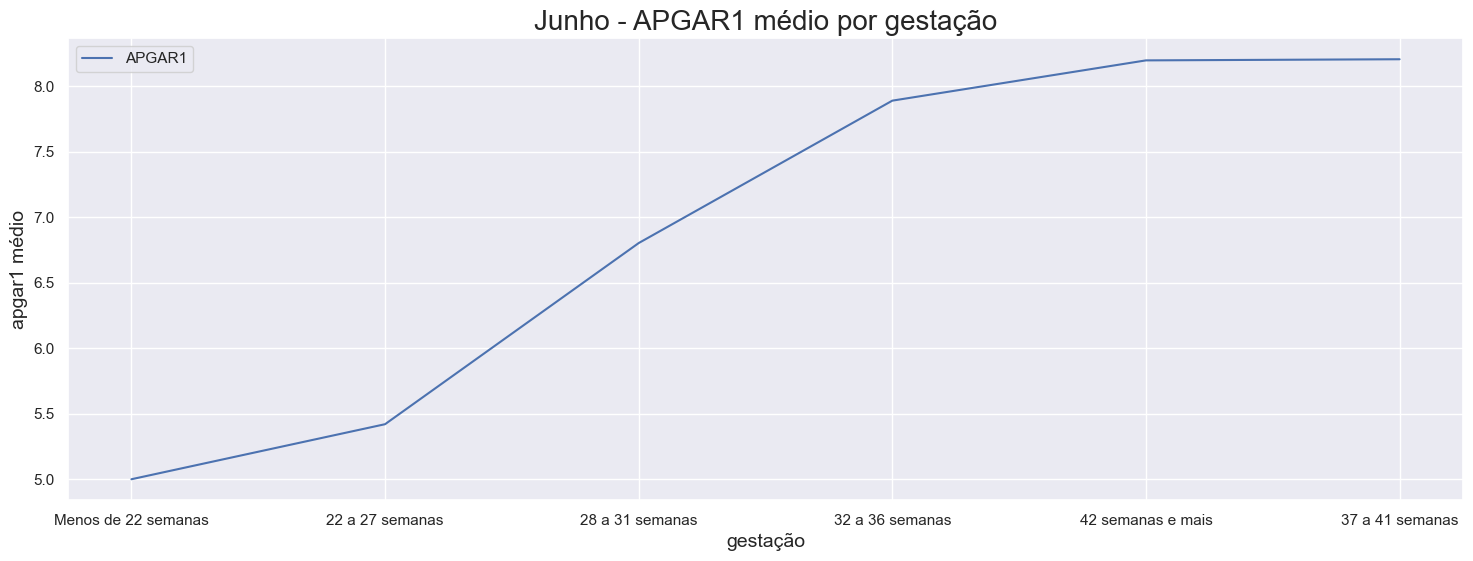

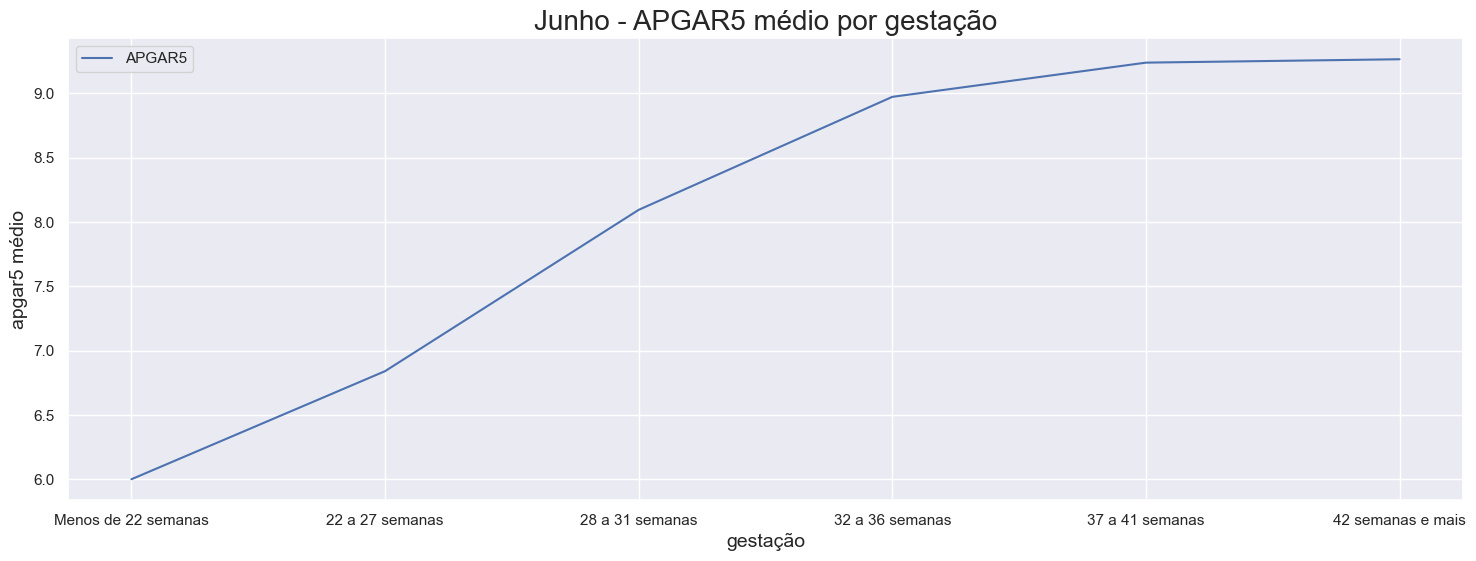


================ Dezembro ================



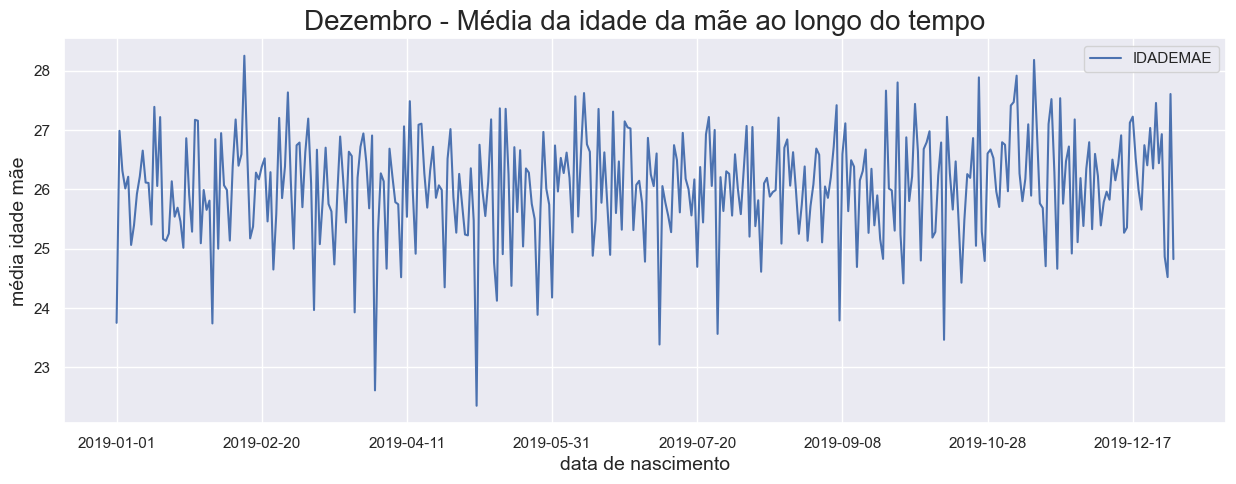

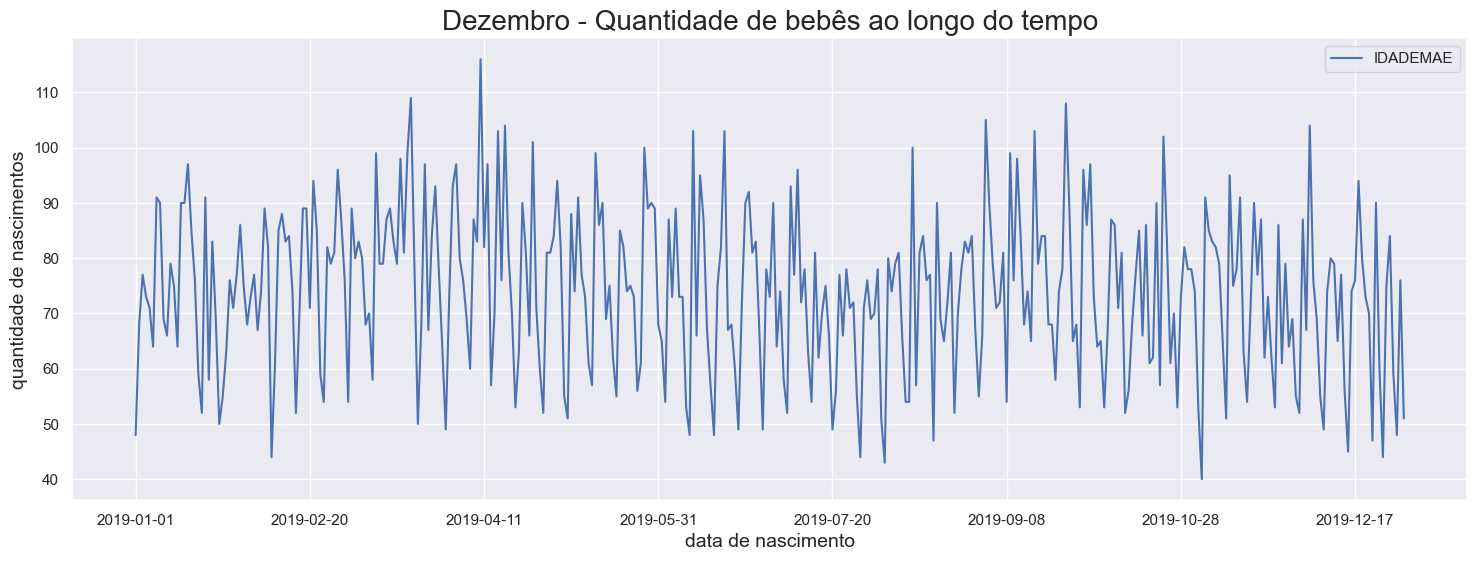

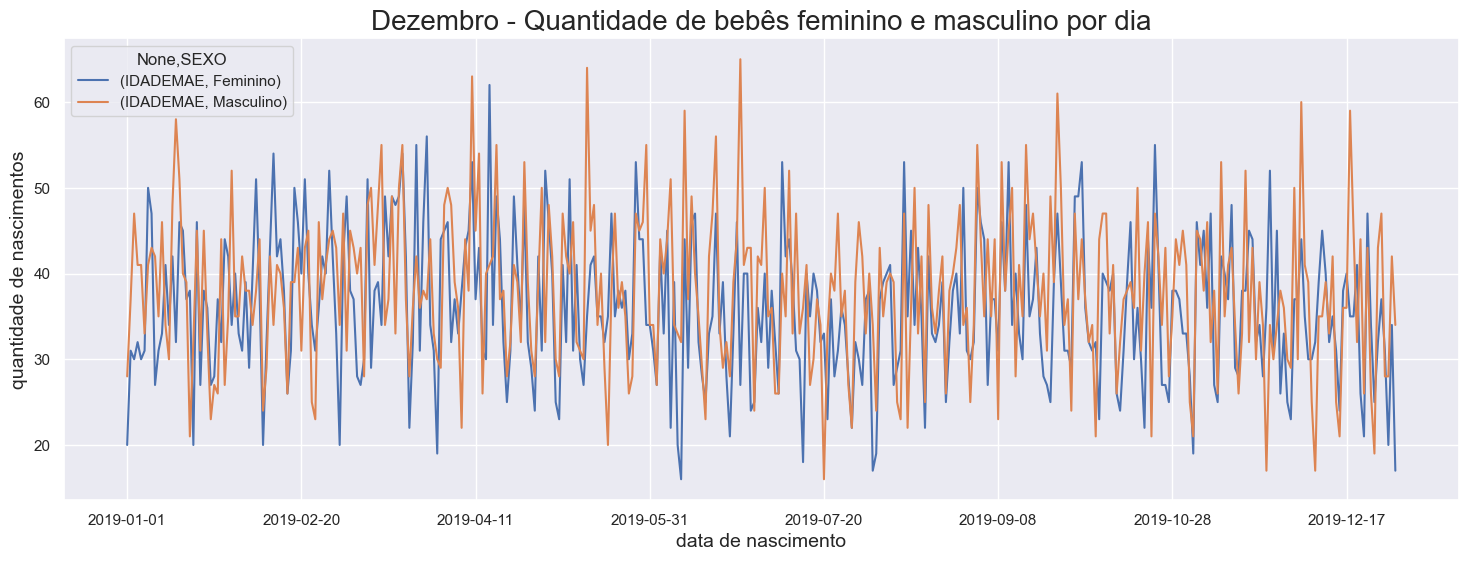

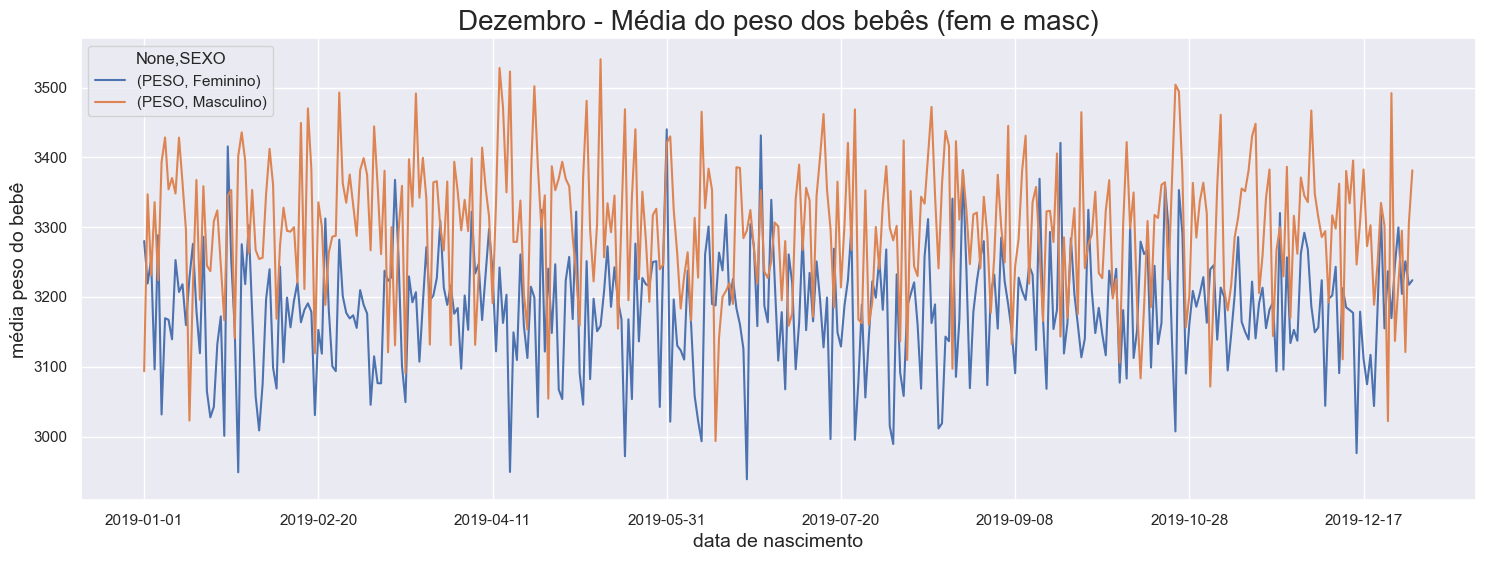

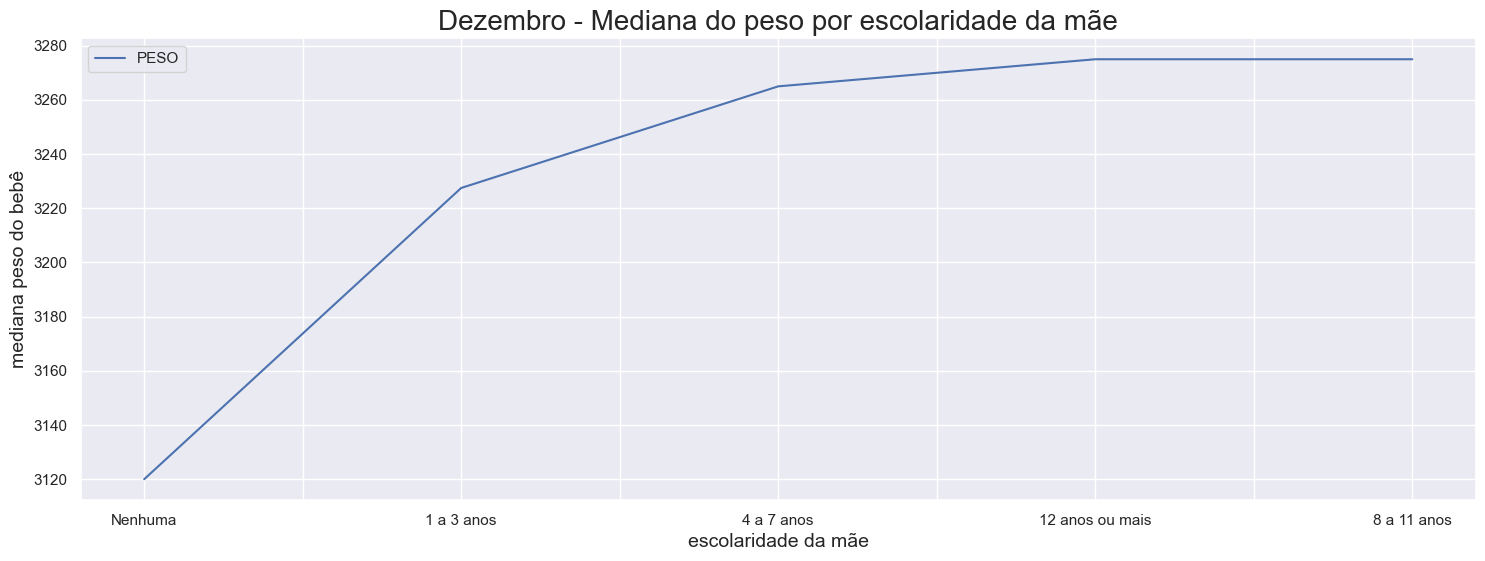

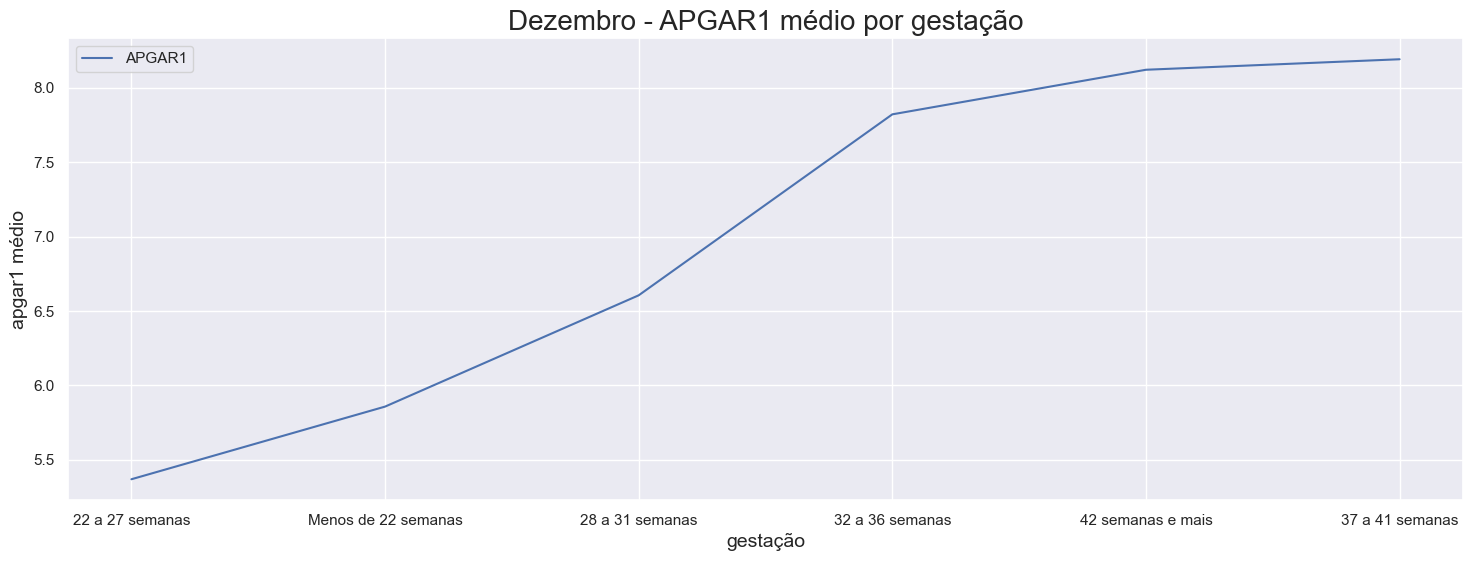

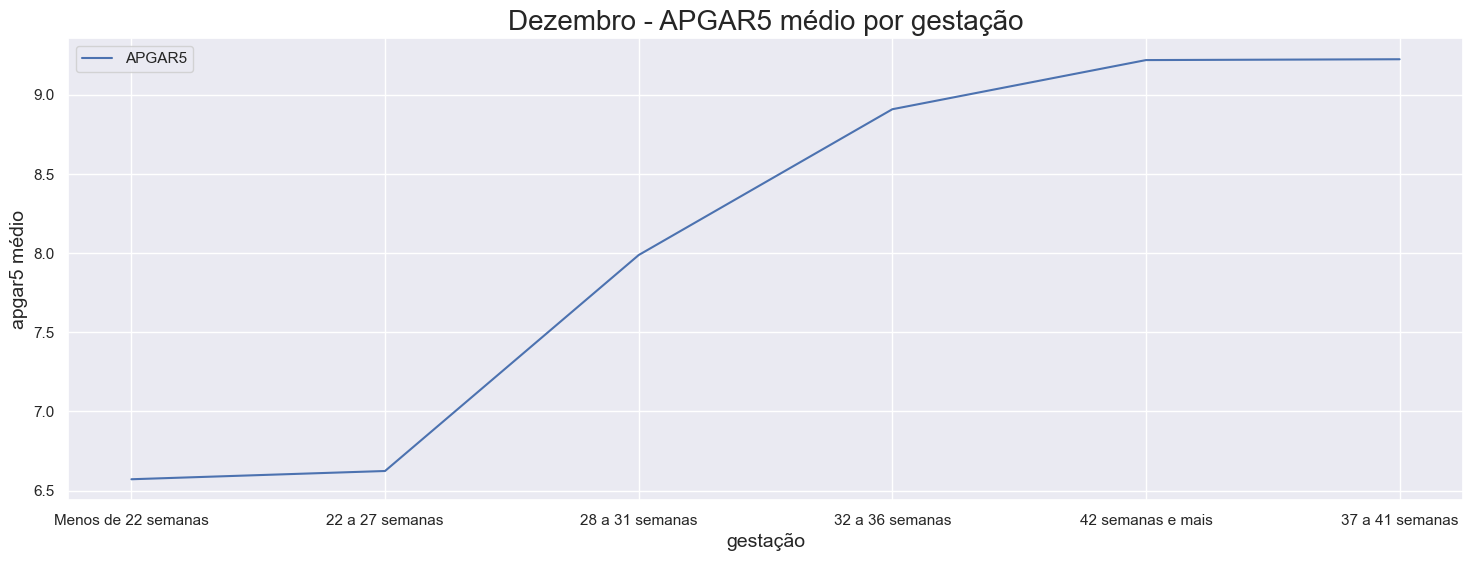

In [49]:
arquivos_meses = {
    'MAR': 'SINASC_RO_2019_MAR.csv',
    'ABR': 'SINASC_RO_2019_ABR.csv',
    'MAI': 'SINASC_RO_2019_MAI.csv',
    'JUN': 'SINASC_RO_2019_JUN.csv',
    'DEZ': 'SINASC_RO_2019_DEZ.csv'
}

nomes_meses = {
    'MAR': 'Março',
    'ABR': 'Abril',
    'MAI': 'Maio',
    'JUN': 'Junho',
    'DEZ': 'Dezembro'
}

for sigla, arquivo in arquivos_meses.items():
    nome_mes = nomes_meses[sigla]
    print(f'\n================ {nome_mes} ================\n')

    df_mes = pd.read_csv(f'./input/{arquivo}')
    gerar_graficos_mes(df_mes, nome_mes, sigla)

## Considerações sobre Automação e Otimização do Processo

Para deixar o processo de geração de gráficos ainda mais automatizado, eu poderia evoluir o código criando uma função principal capaz de detectar automaticamente todos os arquivos disponíveis na pasta input, sem necessidade de informar manualmente as siglas dos meses ou os nomes dos arquivos. Dessa forma, ao adicionar novos meses ou até novos anos de dados, o próprio notebook identificaria os arquivos, carregaria os dataframes e geraria os gráficos correspondentes.

Além disso, seria possível padronizar todos os títulos, nomes de arquivos e estrutura de pastas com base na leitura automática das datas dentro do próprio dataset (coluna DTNASC). Isso eliminaria a necessidade de manter um dicionário com os nomes dos meses, tornando o processo totalmente independente de intervenções manuais.

Outra melhoria futura seria transformar esse notebook em um script Python executável (um .py) ou até uma função agendada, permitindo que, mensalmente, ao chegar um novo arquivo do SINASC, os gráficos fossem gerados automaticamente e salvos nas pastas corretas, sem precisar abrir o Jupyter Notebook.

Em resumo, o próximo passo natural para otimizar este projeto seria automatizar completamente a leitura dos arquivos, a identificação dos meses e a geração dos gráficos, deixando o processo mais dinâmico, escalável e prático para uso em meses e anos seguintes.